# Introductory Data Analysis

In [7]:
%matplotlib inline

import json

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = plt.cycler(color=dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [8]:
profiles = pd.read_csv('data_cleaned.csv')

In [9]:
def histogram_style():
    remove_border(left=False)
    plt.grid(False)
    plt.grid(axis='y', color='w', linestyle='-', lw=1)

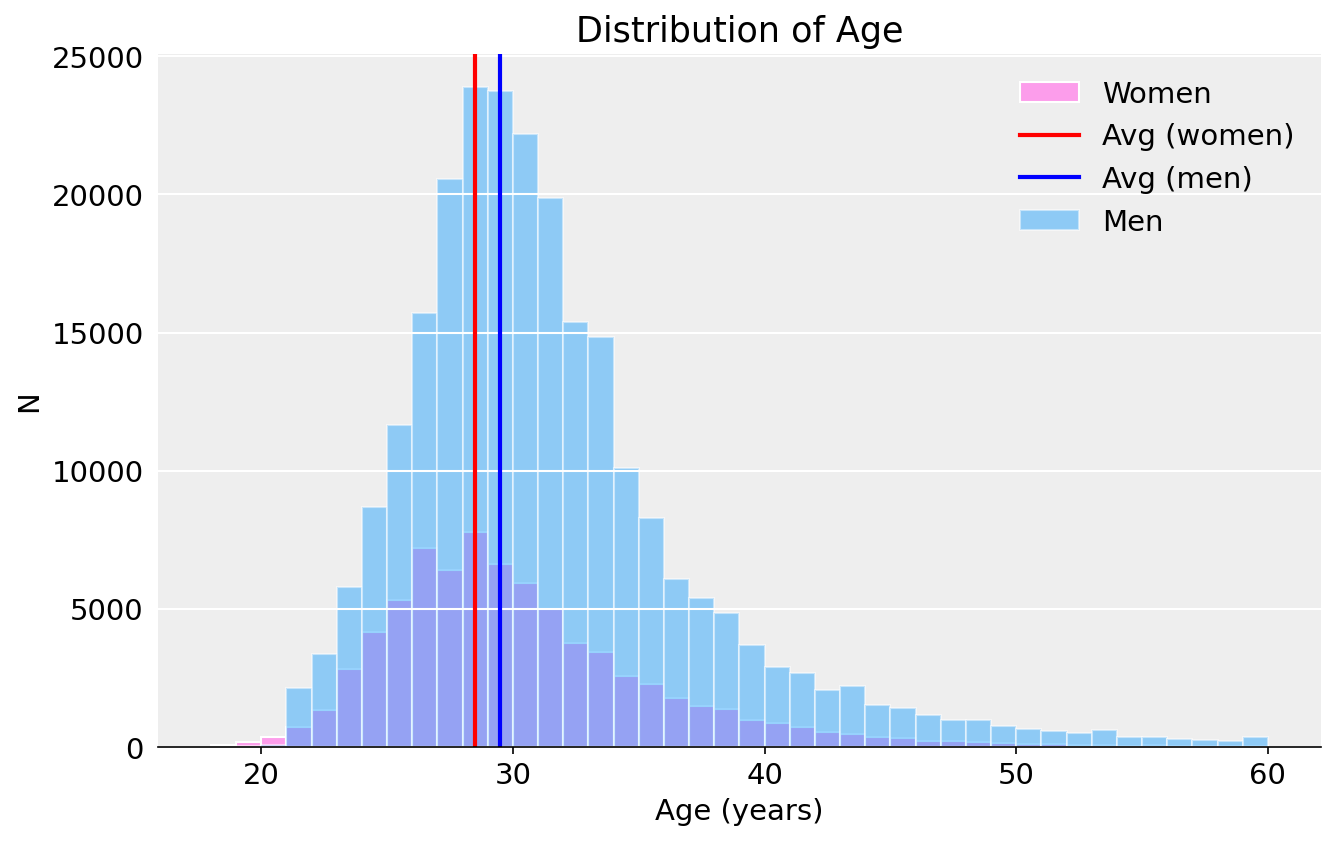

In [10]:
profiles[profiles.gender==0].age1.hist(bins = np.linspace(18, 60, 43), edgecolor='white', color='#FC9DEB', label='Women')
plt.xlabel("Age (years)")
plt.ylabel("N")
plt.title("Distribution of Age")
plt.axvline(28.5, 0, 1, color='r', label='Avg (women)')
plt.axvline(29.5, 0, 1, color='b', label='Avg (men)')
profiles[profiles.gender==1].age1.hist(bins = np.linspace(18, 60, 43), edgecolor='white', color='#30A7FC', label='Men', alpha=0.5)
plt.legend(frameon=False, loc='upper right')
histogram_style()

#### As expected, the average men's age is slightly higher than the average women's age, and both look normally distributed. However the difference isn't much, as the avg women's age is quite high (28). 

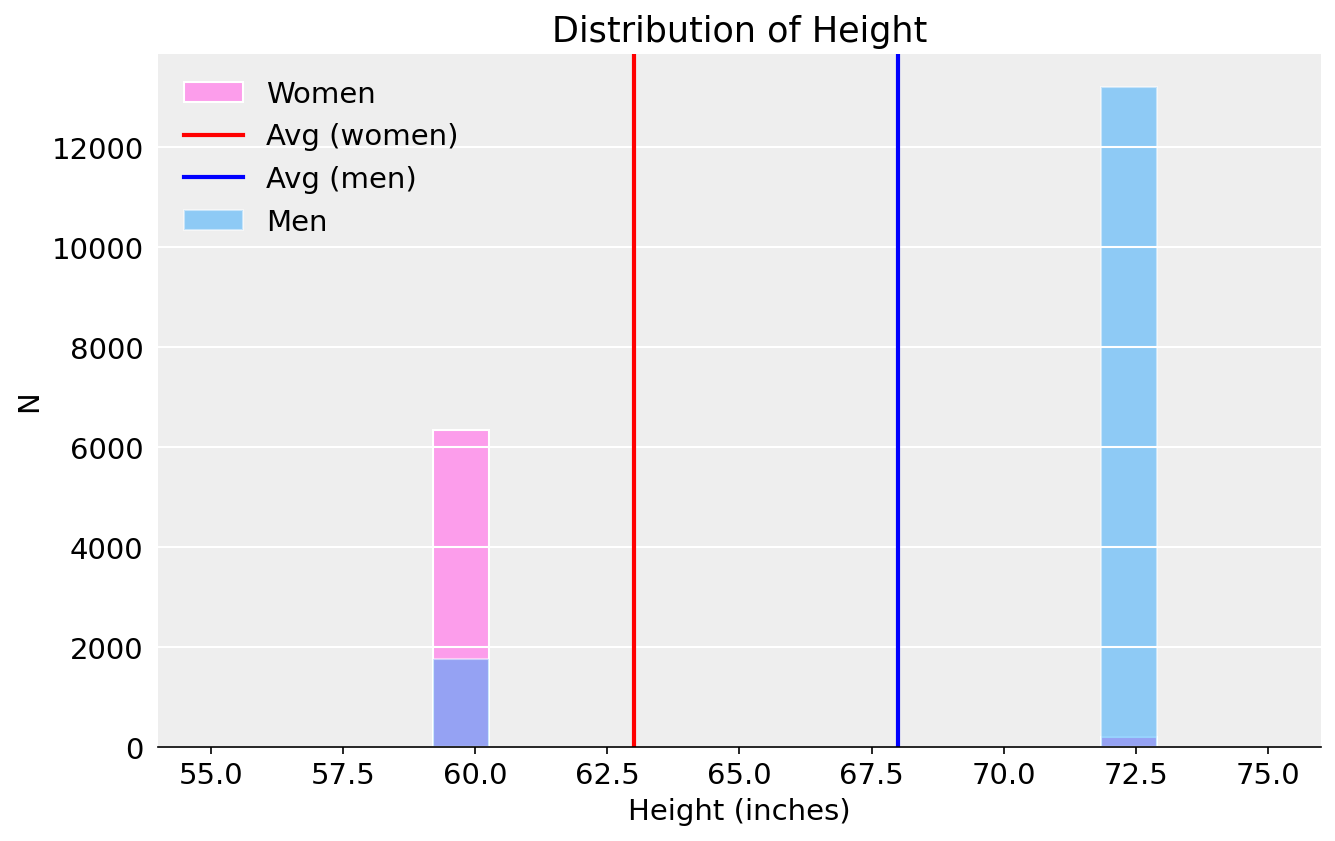

In [11]:
profiles[profiles.gender==0].height1.hist(bins = np.linspace(55, 75, 20), edgecolor='white', color='#FC9DEB', label='Women')
plt.xlabel("Height (inches)")
plt.ylabel("N")
plt.title("Distribution of Height")
plt.axvline(63, 0, 1, color='r', label='Avg (women)')
plt.axvline(68, 0, 1, color='b', label='Avg (men)')
profiles[profiles.gender==1].height1.hist(bins = np.linspace(55, 75, 20), edgecolor='white', color='#30A7FC', label='Men', alpha=0.5)
plt.legend(frameon=False, loc='upper left')
histogram_style()

#### Both average women's height (5 foot 3) and average men's height (5 foot 8) is higher than the Indian averages found on Wikipedia. Both look normally distributed as expected. However there are local peeks at 5 ft for women and six feet for men. 

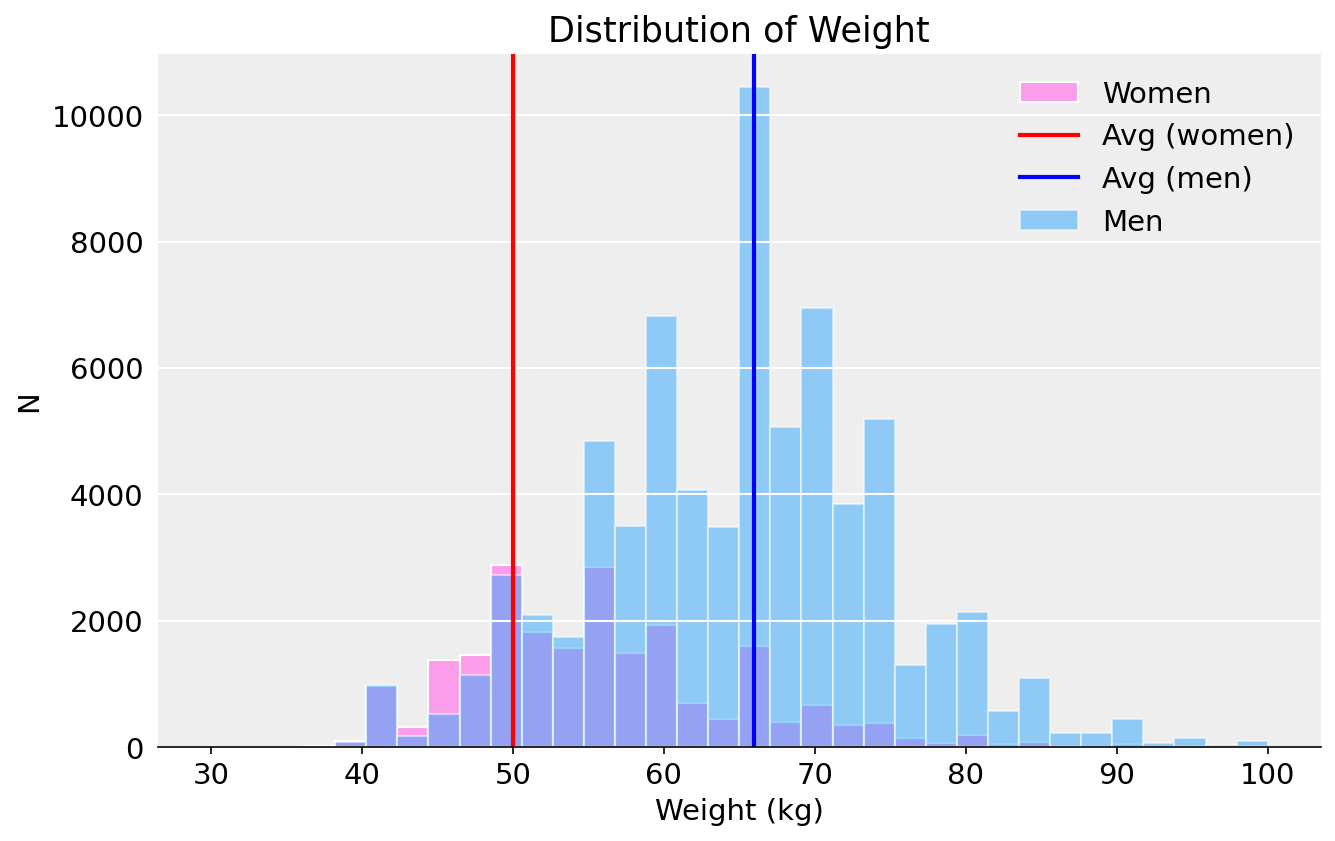

In [12]:
profiles[profiles.gender==0].weight1.hist(bins = np.linspace(30, 100, 35), edgecolor='white', color='#FC9DEB', label='Women')
plt.xlabel("Weight (kg)")
plt.ylabel("N")
plt.title("Distribution of Weight")
plt.axvline(50, 0, 1, color='r', label='Avg (women)')
plt.axvline(66, 0, 1, color='b', label='Avg (men)')
profiles[profiles.gender==1].weight1.hist(bins = np.linspace(30, 100, 35), edgecolor='white', color='#30A7FC', label='Men', alpha=0.5)
plt.legend(frameon=False, loc='upper right')
histogram_style()

#### Women's weight does not look normally distributed, as it is denser before the average and sparser after the average. 

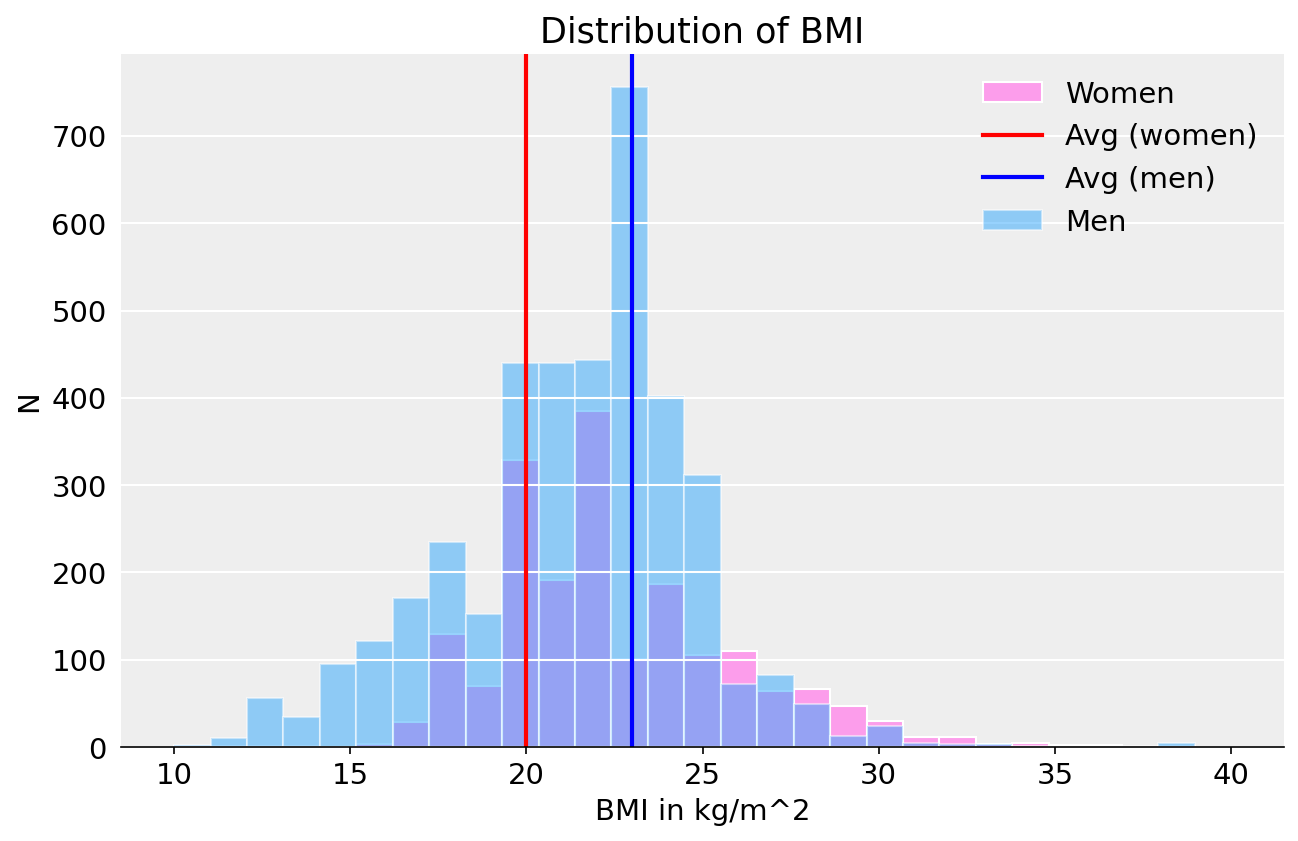

In [13]:
profiles['bmi'] = profiles['weight1'] / ((profiles['height1']*0.0254)**2)
profiles[profiles.gender==0].bmi.hist(bins = np.linspace(10, 40, 30), color='#FC9DEB', edgecolor='white', label='Women')
plt.xlabel("BMI in kg/m^2")
plt.ylabel("N")
plt.title("Distribution of BMI")
plt.axvline(20, 0, 1, color='r', label='Avg (women)')
plt.axvline(23, 0, 1, color='b', label='Avg (men)')
profiles[profiles.gender==1].bmi.hist(bins = np.linspace(10, 40, 30), color='#30A7FC', edgecolor='white', alpha=0.5, label='Men')
plt.legend(frameon=False, loc='upper right')
histogram_style()

#### BMI looks normally distributed, as expected. 

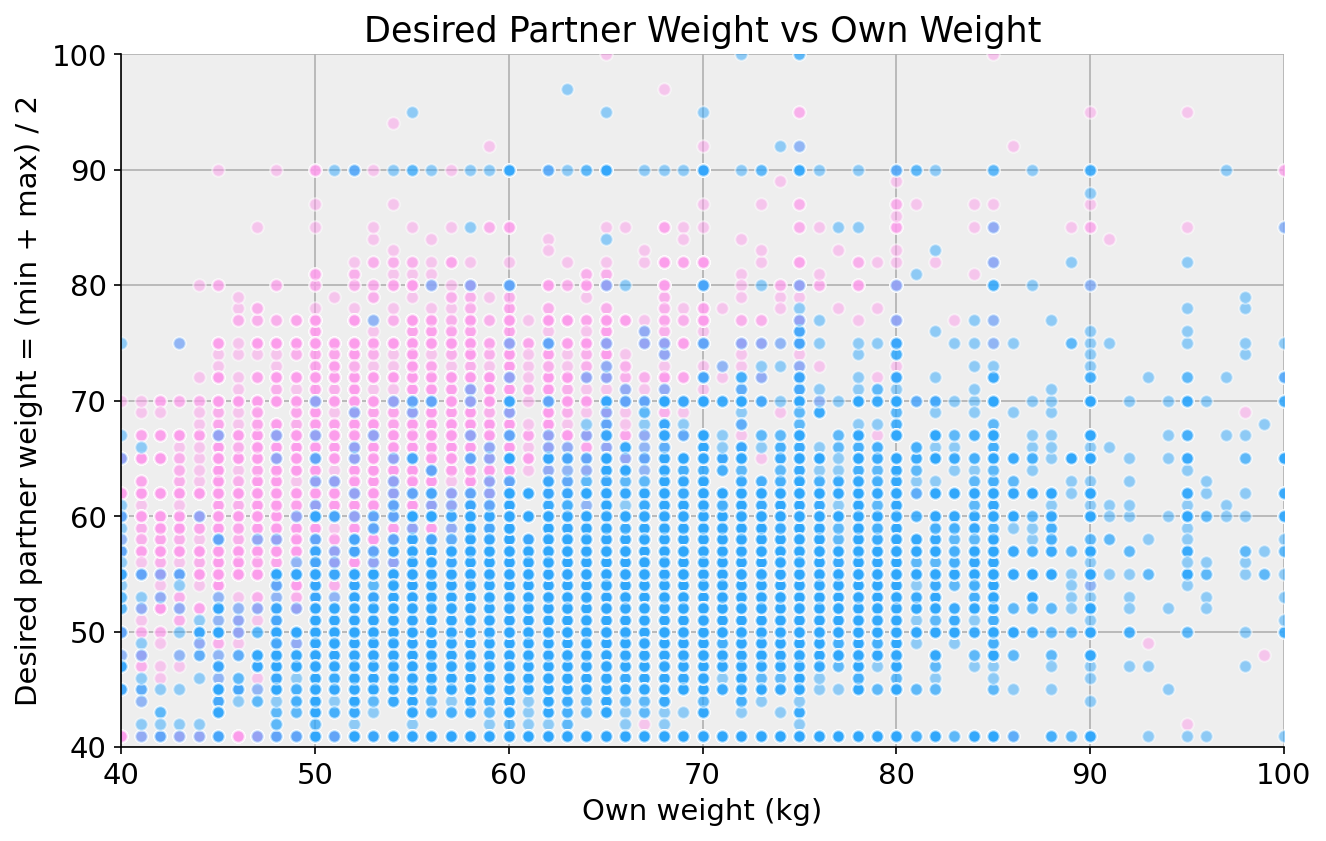

In [14]:
plt.plot(profiles[profiles.gender==0].weight1, profiles[profiles.gender==0].weight2, 'o', mec='w', color='#FC9DEB', alpha=0.5, label='Weight in Kg')
plt.title("Desired Partner Weight vs Own Weight")
plt.xlabel("Own weight (kg)")
plt.ylabel("Desired partner weight = (min + max) / 2")
plt.plot(profiles[profiles.gender==1].weight1, profiles[profiles.gender==1].weight2, 'o', mec='w', color='#30A7FC', alpha=0.5, label='Weight in Kg')
plt.ylim([40,100])
plt.xlim([40,100])
remove_border()
plt.show()

#### Interestingly, for women the desired partner's weight is more correlated with their own weight, and increases as own weight increases. For men it stays at within 40-60kg even as men's weight approaches 70kg, but then increases slightly thereafter. 

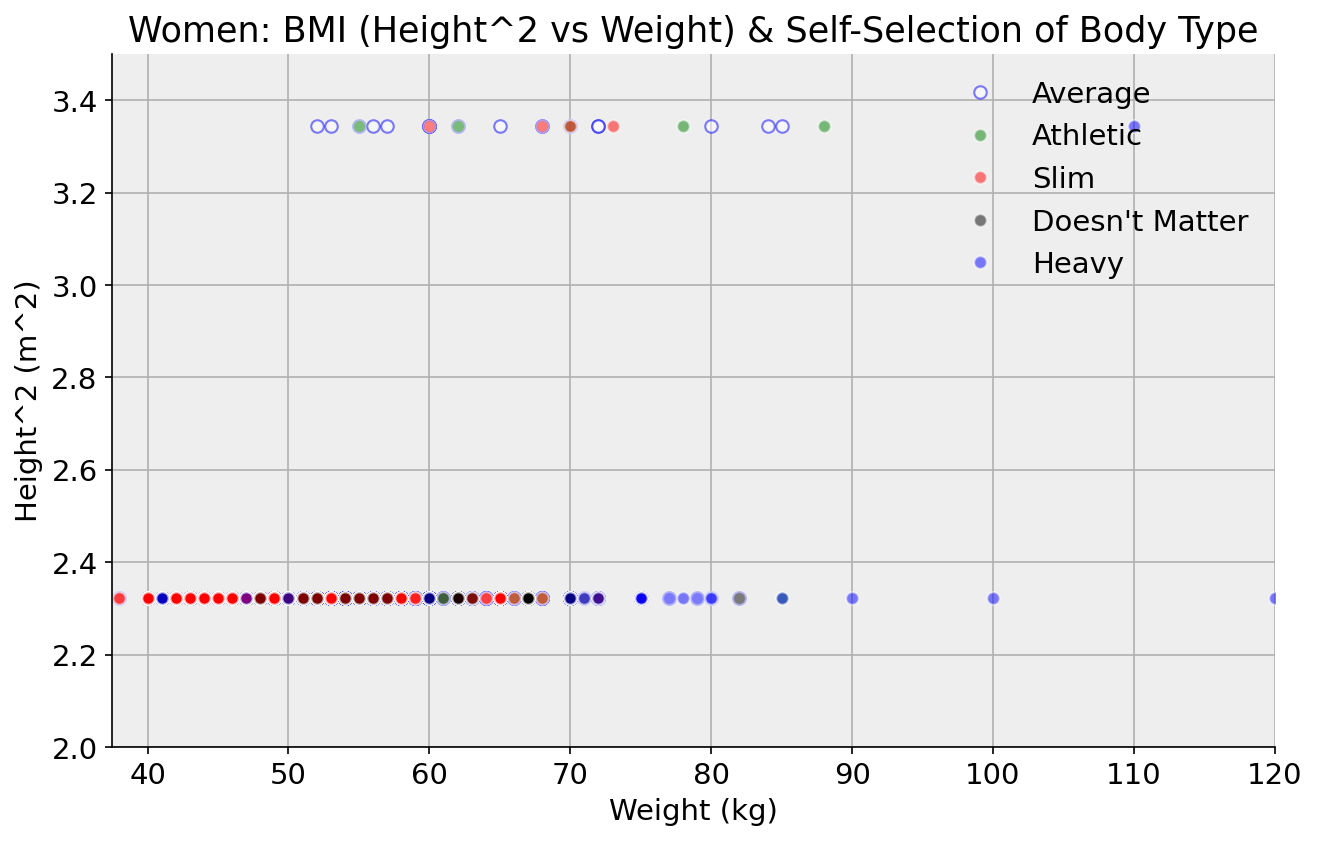

In [15]:
plt.plot(profiles['weight1'][(profiles.gender==0) & (profiles["body1"] == 2)], ((profiles['height1'][(profiles.gender==0) & (profiles["body1"] == 2)])*0.0254)**2, 'o', mec='b', color='w', alpha=0.5, label='Average')
plt.plot(profiles['weight1'][(profiles.gender==0) & (profiles["body1"] == 4)], ((profiles['height1'][(profiles.gender==0) & (profiles["body1"] == 4)])*0.0254)**2, 'o', mec='w', color='g', alpha=0.5, label='Athletic')
plt.plot(profiles['weight1'][(profiles.gender==0) & (profiles["body1"] == 1)], ((profiles['height1'][(profiles.gender==0) & (profiles["body1"] == 1)])*0.0254)**2, 'o', mec='w', color='r', alpha=0.5, label='Slim')
plt.plot(profiles['weight1'][(profiles.gender==0) & (profiles["body1"] == 0)], ((profiles['height1'][(profiles.gender==0) & (profiles["body1"] == 0)])*0.0254)**2, 'o', mec='w', color='#000000', alpha=0.5, label='Doesn\'t Matter')
plt.plot(profiles['weight1'][(profiles.gender==0) & (profiles["body1"] == 3)], ((profiles['height1'][(profiles.gender==0) & (profiles["body1"] == 3)])*0.0254)**2, 'o', mec='w', color='b', alpha=0.5, label='Heavy')
plt.title("Women: BMI (Height^2 vs Weight) & Self-Selection of Body Type")
plt.ylabel("Height^2 (m^2)")
plt.xlabel("Weight (kg)")
plt.xlim([37.5,120])
plt.ylim([2,3.5])
plt.legend(frameon=False, loc='upper right')
remove_border()

#### As expected there are more slim women on the left side of the graph, and more athletic and heavy on the right. Average women are distributed throughout. 

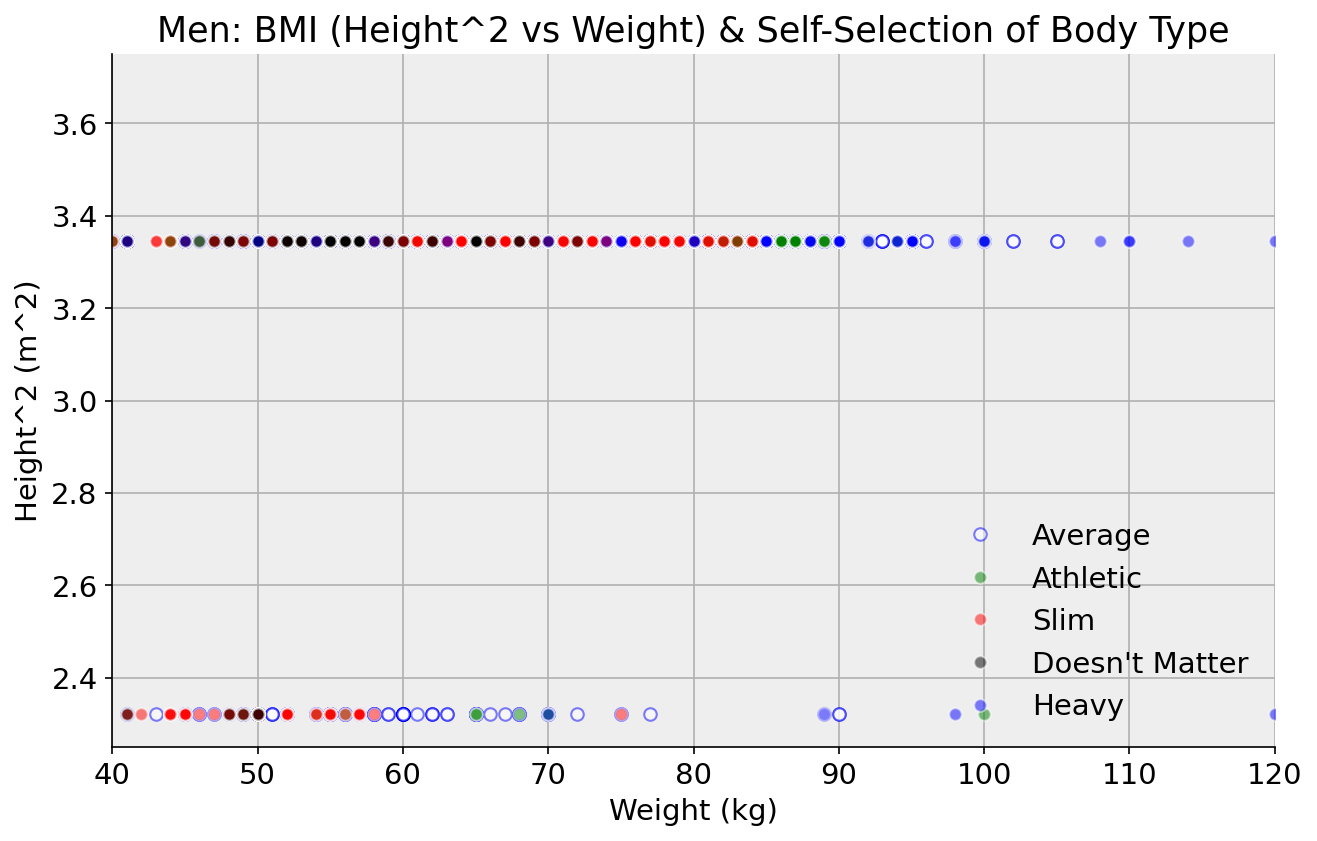

In [16]:
plt.plot(profiles['weight1'][(profiles.gender==1) & (profiles["body1"] == 2)], ((profiles['height1'][(profiles.gender==1) & (profiles["body1"] == 2)])*0.0254)**2, 'o', color='w',  mec='b',alpha=0.5, label='Average')
plt.plot(profiles['weight1'][(profiles.gender==1) & (profiles["body1"] == 4)], ((profiles['height1'][(profiles.gender==1) & (profiles["body1"] == 4)])*0.0254)**2, 'o', color='g', mec='w', alpha=0.5, label='Athletic')
plt.plot(profiles['weight1'][(profiles.gender==1) & (profiles["body1"] == 1)], ((profiles['height1'][(profiles.gender==1) & (profiles["body1"] == 1)])*0.0254)**2, 'o', color='r', mec='w', alpha=0.5, label='Slim')
plt.plot(profiles['weight1'][(profiles.gender==1) & (profiles["body1"] == 0)], ((profiles['height1'][(profiles.gender==1) & (profiles["body1"] == 0)])*0.0254)**2, 'o', color='#000000',  mec='w',alpha=0.5, label='Doesn\'t Matter')
plt.plot(profiles['weight1'][(profiles.gender==1) & (profiles["body1"] == 3)], ((profiles['height1'][(profiles.gender==1) & (profiles["body1"] == 3)])*0.0254)**2, 'o', color='b',  mec='w',alpha=0.5, label='Heavy')
plt.title("Men: BMI (Height^2 vs Weight) & Self-Selection of Body Type")
plt.ylabel("Height^2 (m^2)")
plt.xlabel("Weight (kg)")
plt.xlim([40,120])
plt.ylim([2.25,3.75])
plt.legend(frameon=False, loc='lower right')
remove_border()

#### As expected there are more slim men on the left side of the graph, and more athletic and heavy on the right. Average men are distributed throughout. 

In [17]:
def count_unique(keys):
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    return uniq_keys, np.bincount(bins)

x = profiles['body1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['body1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['body1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['body1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

zip(ii,y[ii]) 

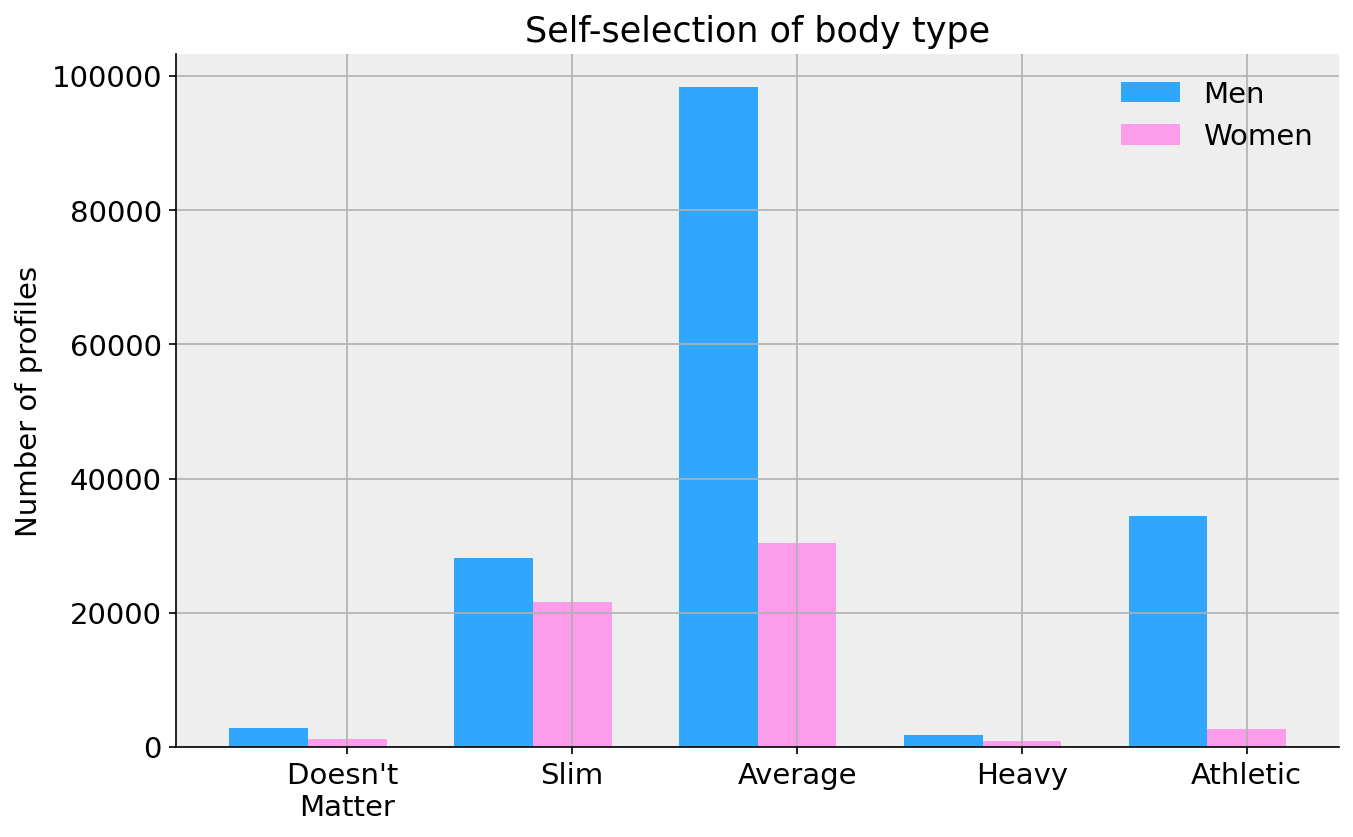

In [18]:
ind = np.arange(5)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(ind+width, y[ii], width, color='#FC9DEB')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Self-selection of body type')
ax.set_xticks(np.arange(5)+width)
ax.set_xticklabels( ("Doesn't \nMatter", "Slim", 'Average', 'Heavy', 'Athletic') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') , frameon=False)
remove_border()
plt.show()

#### As expected, slim is a more popular choice among women, and athletic is more popular among men. 

In [19]:
x = profiles['complexion1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['complexion1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['complexion1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['complexion1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

zip(ii,y[ii])

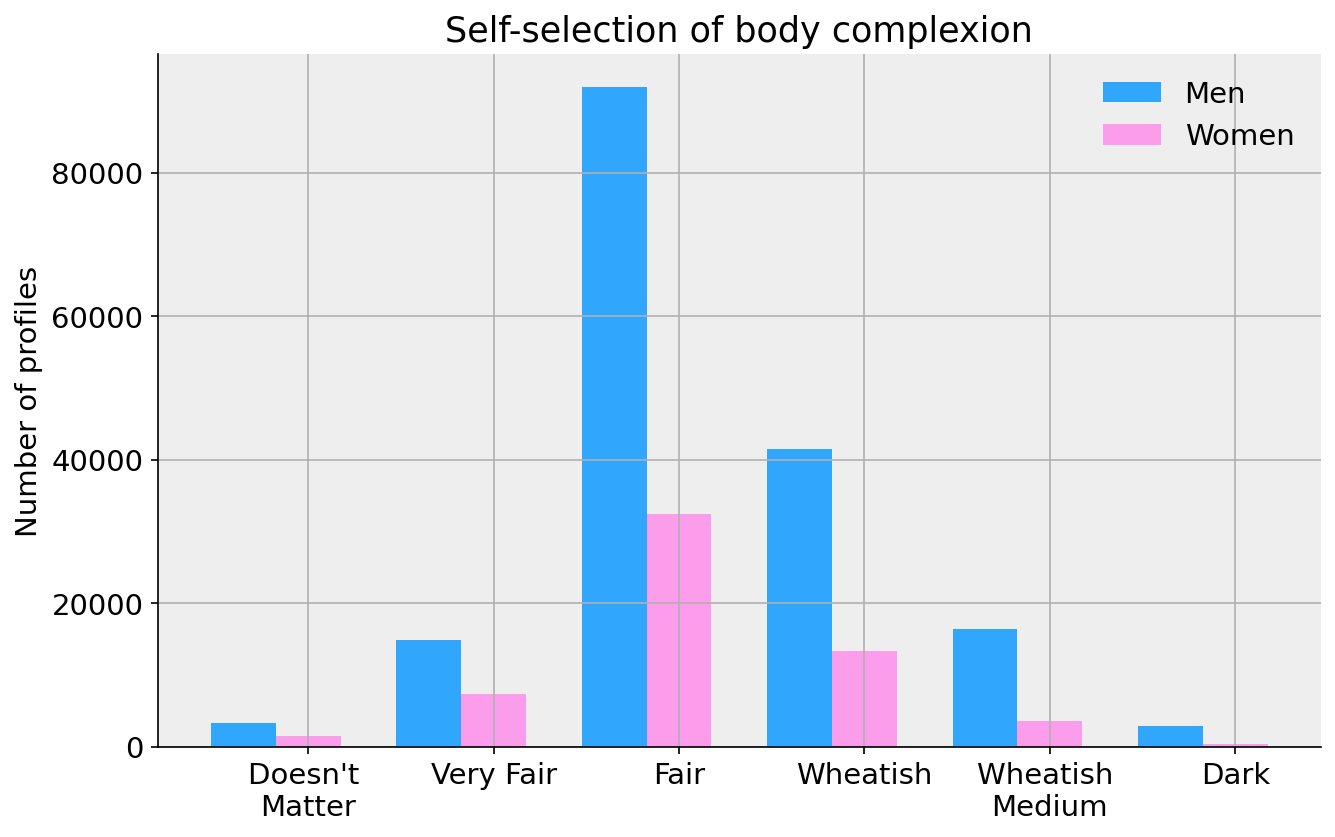

In [20]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(6), y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(np.arange(6)+width, y[ii], width, color='#FC9DEB')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Self-selection of body complexion')
ax.set_xticks(np.arange(6)+width)
ax.set_xticklabels( ("Doesn't \nMatter", "Very Fair", 'Fair', 'Wheatish', 'Wheatish \nMedium', 'Dark') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') , frameon=False)
remove_border()
plt.show()

#### Interestingly, fair and very fair are also very popular choices among men. 

In [21]:
x = profiles['eating1'].dropna().astype(int)
y = np.bincount(profiles['eating1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

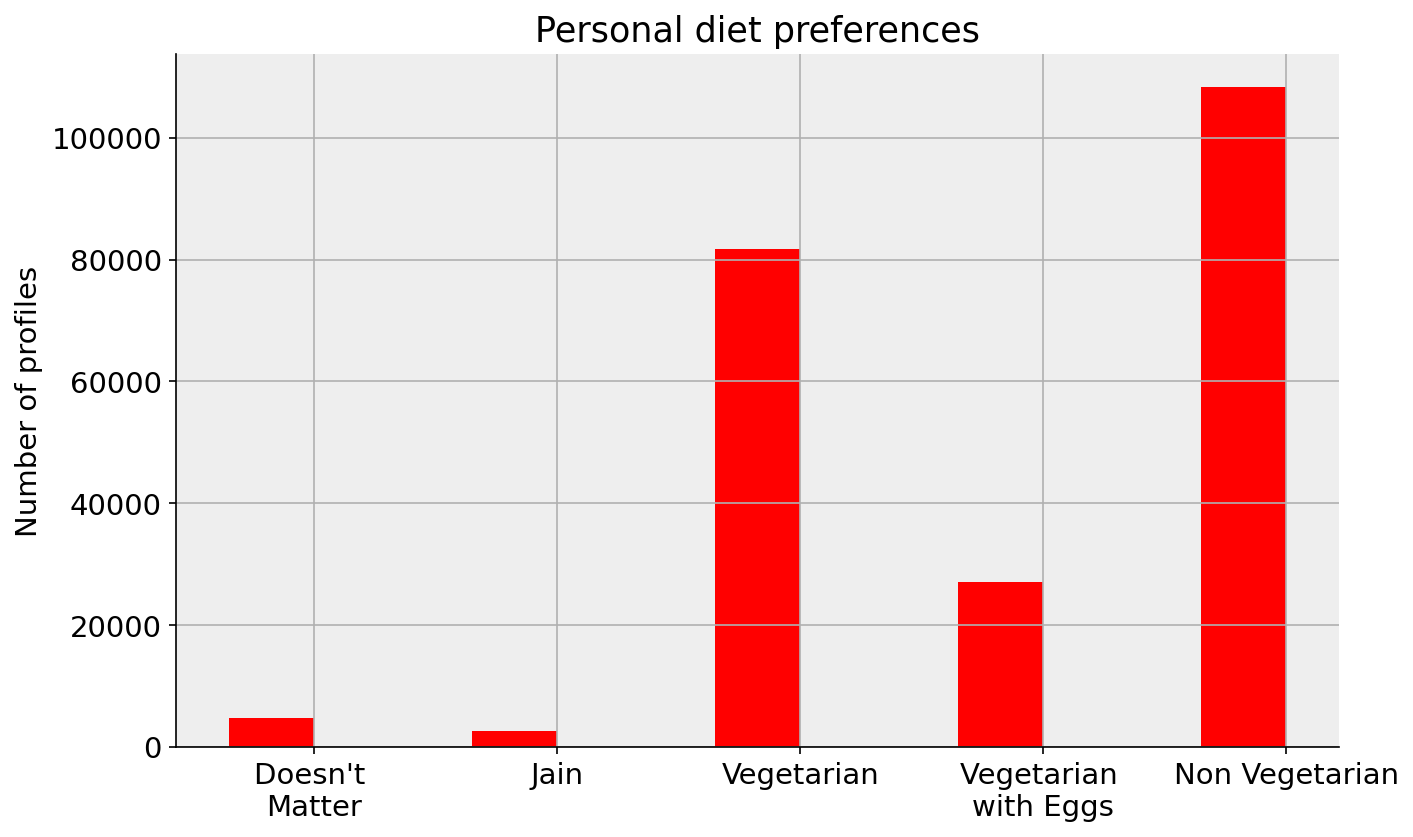

In [22]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(5)+width, y[ii], width, color='r')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Personal diet preferences')
ax.set_xticks(np.arange(5)+(1.5*width))
ax.set_xticklabels( ("Doesn't \nMatter", "Jain", 'Vegetarian', 'Vegetarian \nwith Eggs', 'Non Vegetarian') )
remove_border()
plt.show()

#### (Note: Will be interesting to split this up by religion)

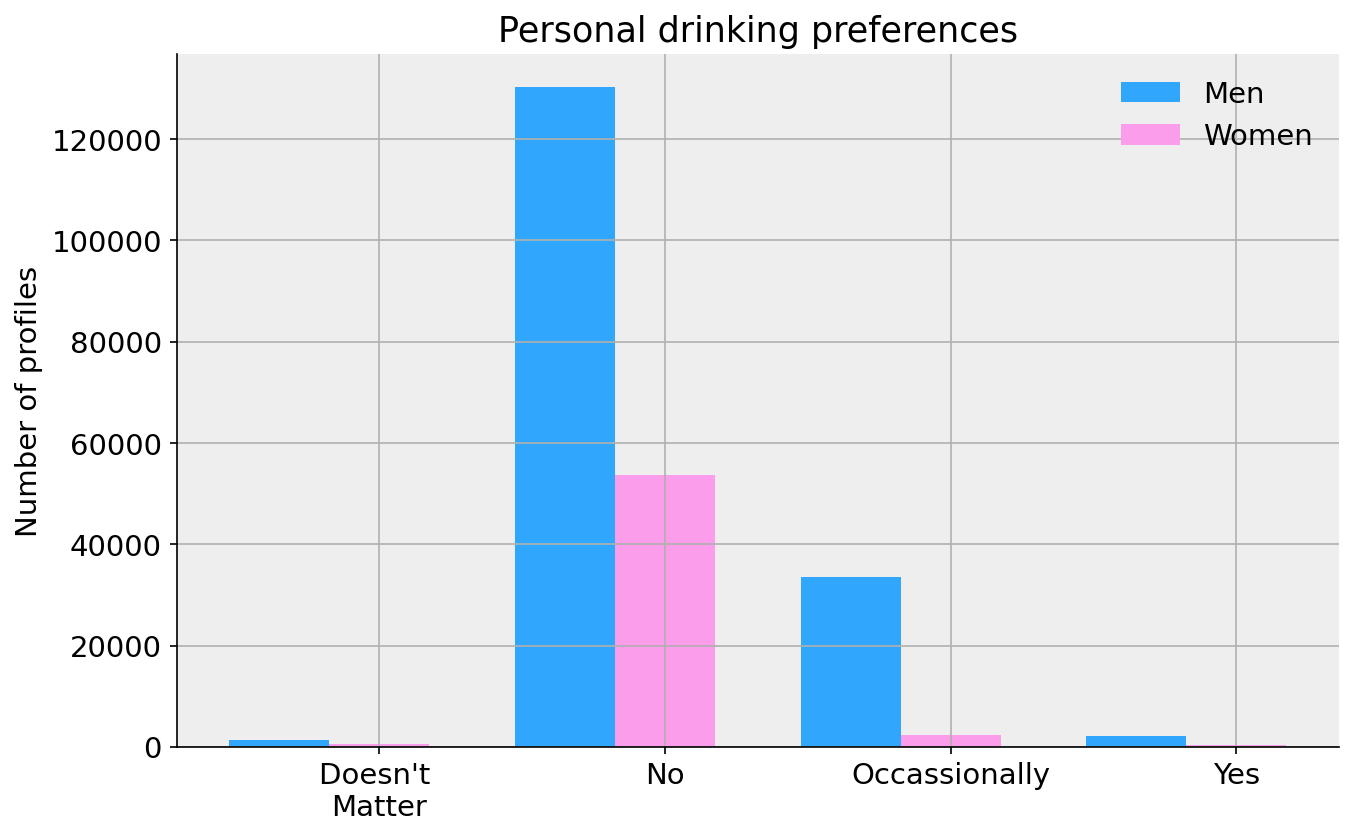

<Figure size 1500x900 with 0 Axes>

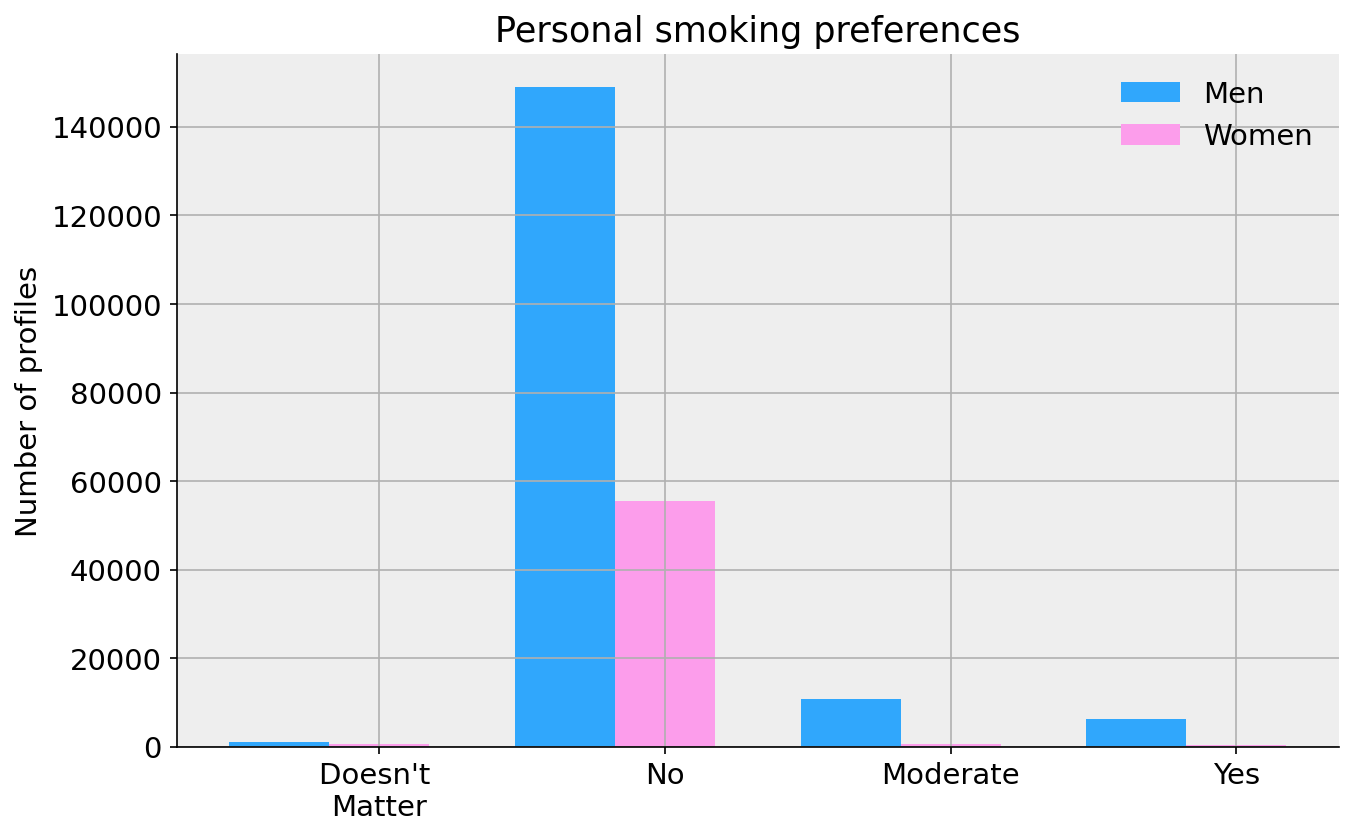

In [23]:
x = profiles['drinking1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['drinking1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['drinking1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['drinking1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(4), y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(np.arange(4)+width, y[ii], width, color='#FC9DEB')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Personal drinking preferences')
ax.set_xticks(np.arange(4)+width)
ax.set_xticklabels( ("Doesn't \nMatter", "No", 'Occassionally', 'Yes') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') , frameon=False)
remove_border()
plt.show()
plt.clf()

x = profiles['smoking1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['smoking1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['smoking1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['smoking1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(4), y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(np.arange(4)+width, y[ii], width, color='#FC9DEB')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Personal smoking preferences')
ax.set_xticks(np.arange(4)+width)
ax.set_xticklabels( ("Doesn't \nMatter", "No", 'Moderate', 'Yes') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women'), frameon=False )
remove_border()        
plt.show()

#### It seems more acceptable for men to admit that they drink occassionally (almost none selected the 'yes' option). The same is true of smoking.  

In [24]:
x = profiles['status1'].dropna().astype(int)
y = np.bincount(profiles['status1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

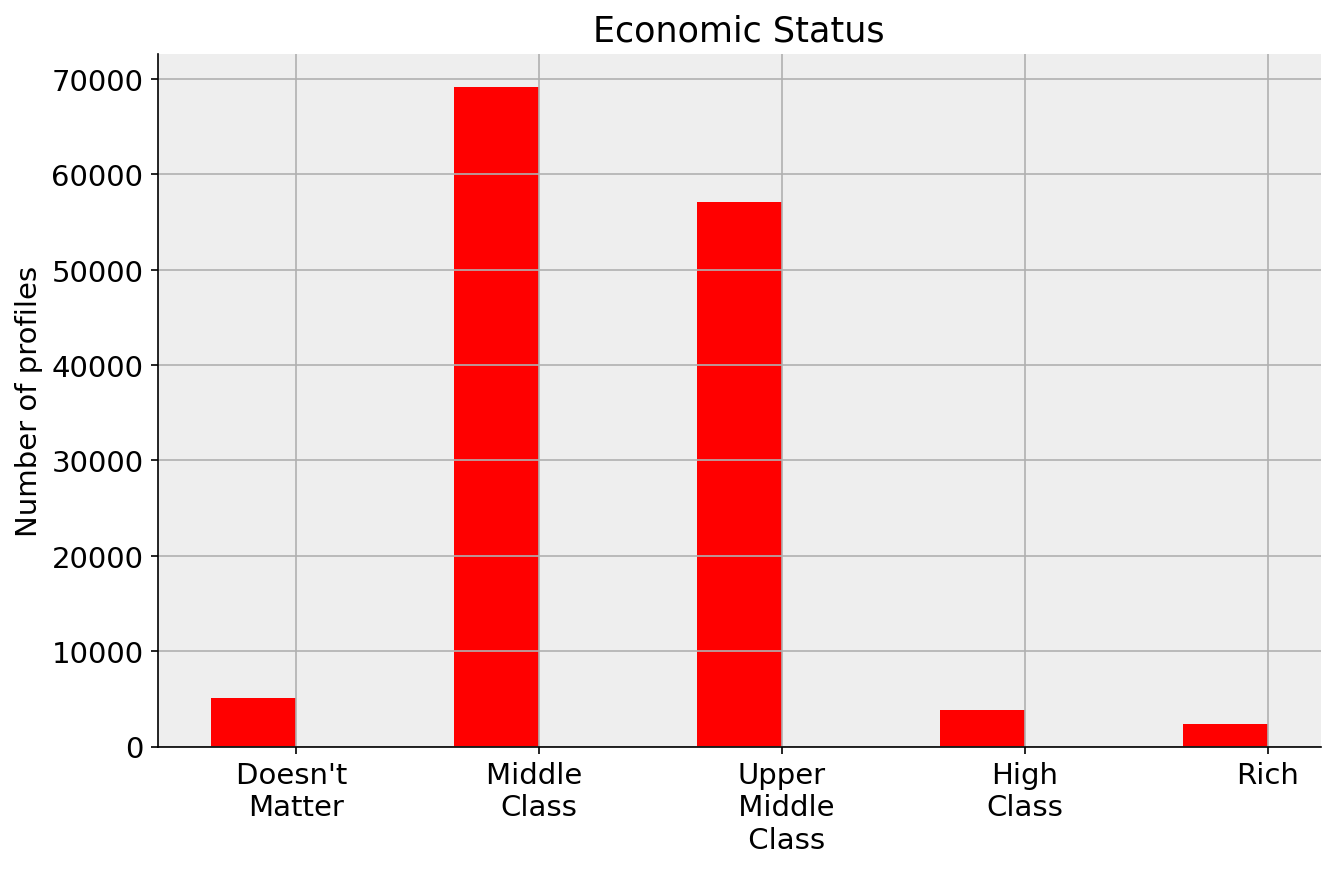

In [25]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(5)+width, y[ii], width, color='r')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Economic Status')
ax.set_xticks(np.arange(5)+(1.5*width))
ax.set_xticklabels( ("Doesn't \nMatter", "Middle \nClass", 'Upper\n Middle\n Class', 'High\nClass', 'Rich') )
remove_border()
plt.show()

In [26]:
x = profiles['marital_status1'].dropna().astype(int)
y = np.bincount(profiles['marital_status1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

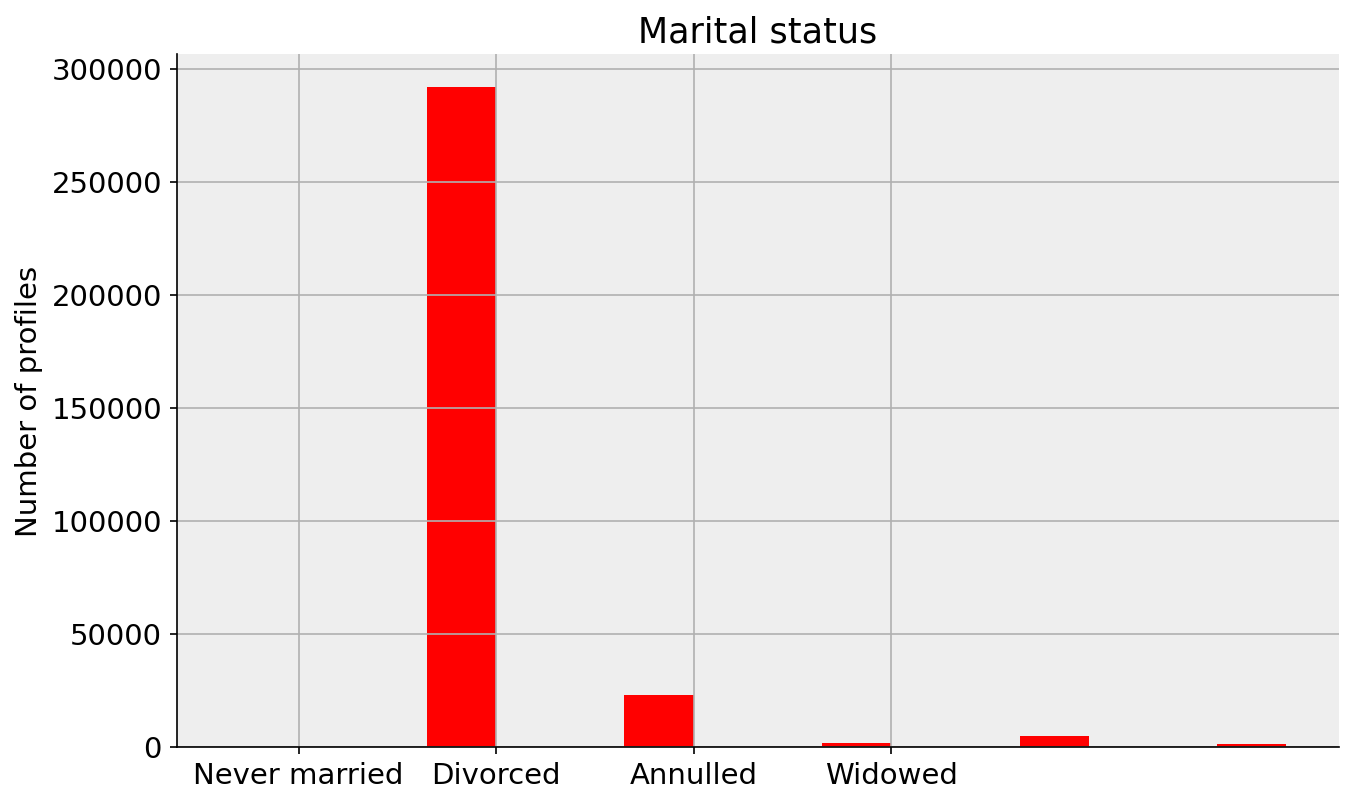

In [28]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(6)+width, y[ii], width, color='r')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Marital status')
ax.set_xticks(np.arange(4)+(1.5*width))
ax.set_xticklabels( ("Never married", 'Divorced', 'Annulled', 'Widowed') )
remove_border()        
plt.show()

In [29]:
x = profiles['religion1'].dropna().astype(int)
y = np.bincount(profiles['religion1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

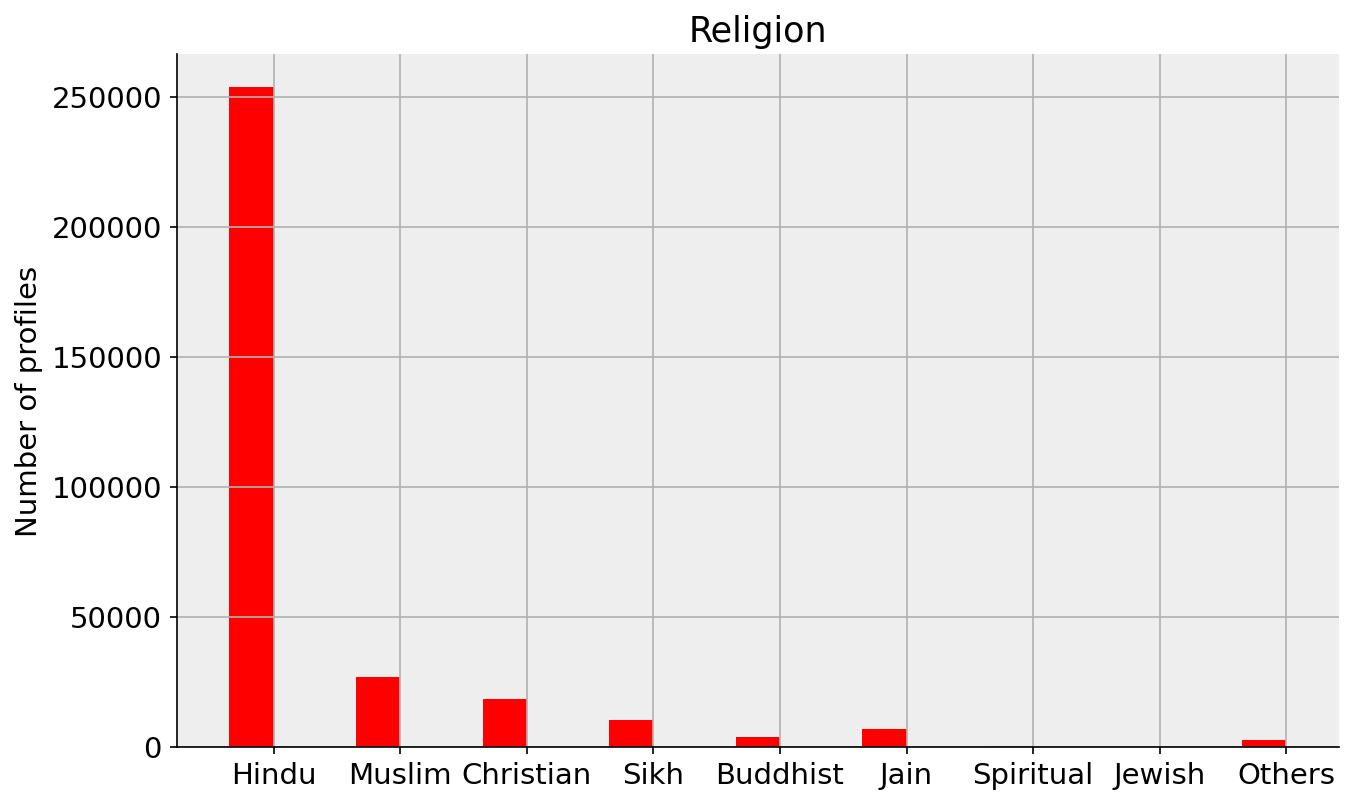

In [30]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(9)+width, y[ii], width, color='r')
# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Religion')
ax.set_xticks(np.arange(9)+(1.5*width))
ax.set_xticklabels( ("Hindu", 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Spiritual', 'Jewish', 'Others') )
remove_border()        
plt.show()

In [31]:
x = profiles['values1'].dropna().astype(int)
y = np.bincount(profiles['values1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

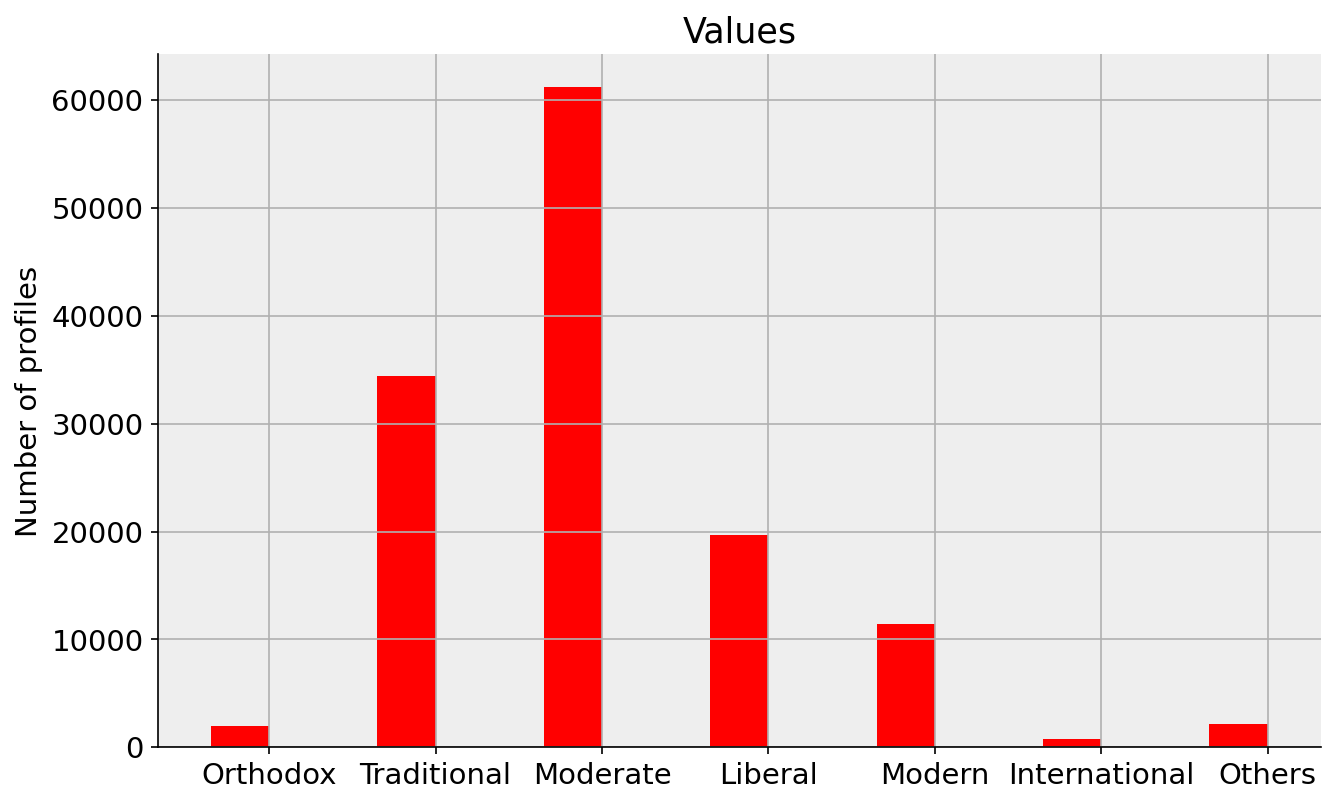

In [32]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(7)+width, y[ii], width, color='r')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Values')
ax.set_xticks(np.arange(7)+(1.5*width))
ax.set_xticklabels( ("Orthodox", 'Traditional', 'Moderate', 'Liberal', 'Modern', 'International', 'Others') )

#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )
remove_border()        
plt.show()

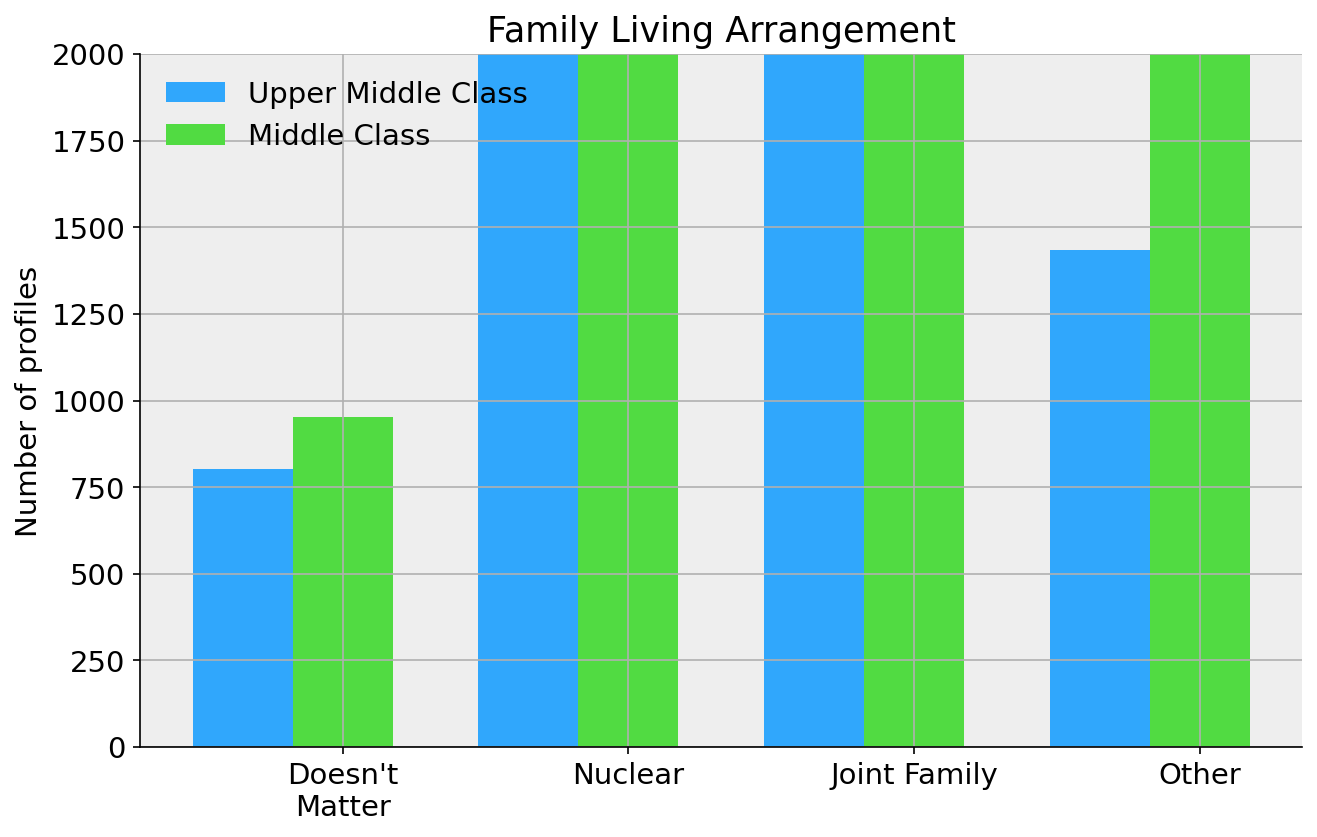

<Figure size 1500x900 with 0 Axes>

In [33]:
x = profiles['family_type1'][(profiles["status1"] == 1)].dropna().astype(int)
y = np.bincount(profiles['family_type1'][(profiles["status1"] == 1)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['family_type1'][(profiles["status1"] == 2)].dropna().astype(int)
y2 = np.bincount(profiles['family_type1'][(profiles["status1"] == 2)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(4), y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(np.arange(4)+width, y[ii], width, color='#51DB42')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Family Living Arrangement')
ax.set_xticks(np.arange(4)+width)
ax.set_xticklabels( ("Doesn't\nMatter", 'Nuclear', 'Joint Family', 'Other') )
plt.ylim([0,2000])

ax.legend( (rects1[0], rects2[0]), ('Upper Middle Class', 'Middle Class') , frameon=False, loc='upper left')
remove_border()
plt.show()
plt.clf()

#### Very interesting- for the middle class, the joint family is still a more popular setup, whereas the upper middle class mostly lives in nuclear families.  

In [40]:
profiles[profiles['family_type1'] == 0][['status1']].dropna()

,status1
96,1.0
137,0.0
389,2.0
604,0.0
609,2.0
...,...
325542,0.0
325647,0.0
325649,0.0
325658,0.0


In [74]:
profiles[profiles['family_type1'] == 0][['status1']].dropna().groupby('status1').value_counts().rename('status1')

status1
0.0    3619
1.0     952
2.0     802
3.0      71
4.0      44
Name: status1, dtype: int64

,status1
96,1.0
137,0.0
389,2.0
604,0.0
609,2.0
...,...
325542,0.0
325647,0.0
325649,0.0
325658,0.0


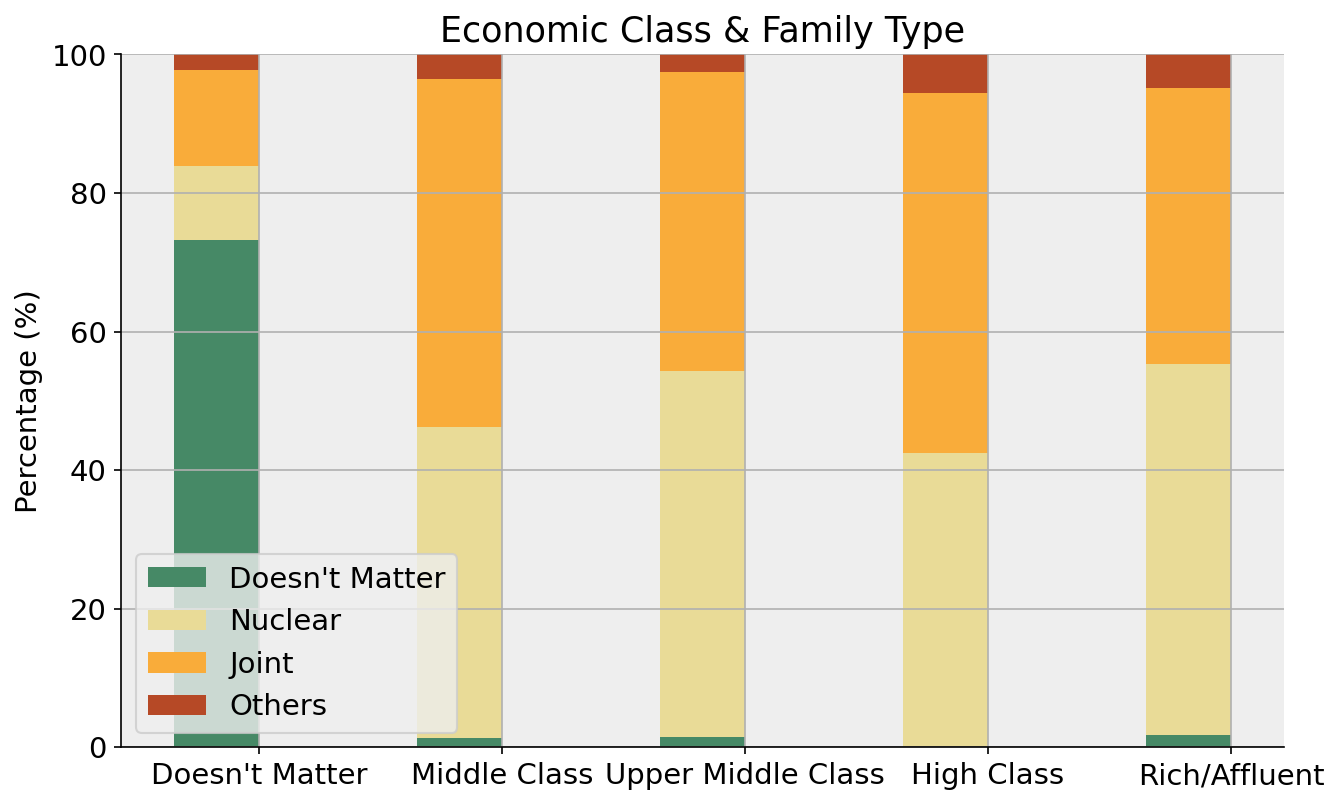

In [75]:
# there are five status1 (earlier 11)
# there are four family types (earlier 5)

temp = profiles[profiles['family_type1'] == 0][['status1']].dropna().groupby('status1').value_counts().rename('status1')
temp[3.0]=0.0
bar0   = temp
bar1 = profiles[profiles['family_type1'] == 1][['status1']].dropna().groupby('status1').value_counts().rename('status1')
bar2 = profiles[profiles['family_type1'] == 2][['status1']].dropna().groupby('status1').value_counts().rename('status1')
bar3 = profiles[profiles['family_type1'] == 3][['status1']].dropna().groupby('status1').value_counts().rename('status1')


ind = np.arange(5)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fbar0 = [0.0] * 5
fbar1 = [0.0] * 5
fbar2 = [0.0] * 5
fbar3 = [0.0] * 5

for i in range(5):
    sum = float(bar0[i] + bar1[i] + bar2[i] + bar3[i])
    fbar0[i] = (100.0*float(bar0[i])) / sum
    fbar1[i] = (100.0*float(bar1[i])) / sum
    fbar2[i] = (100.0*float(bar2[i])) / sum
    fbar3[i] = (100.0*float(bar3[i])) / sum
    
p0 = plt.bar(ind, fbar0, width, color='#468966')
p1 = plt.bar(ind, fbar1, width, color='#E9DB97', bottom=fbar0)
p2 = plt.bar(ind, fbar2, width, color='#F9AC3A', bottom=[(fbar0[i] + fbar1[i]) for i in range(5)])
p3 = plt.bar(ind, fbar3, width, color='#B64926', bottom=[(fbar0[i] + fbar1[i] + fbar2[i]) for i in range(5)])

plt.title('Economic Class & Family Type')
plt.xticks(ind+width/2., ("Doesn't Matter", "Middle Class", 'Upper Middle Class', 'High Class', 'Rich/Affluent'))
plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Doesn\'t Matter', 'Nuclear', 'Joint', 'Others') , frameon=True, loc='lower left')
plt.ylim([0,100])
plt.ylabel('Percentage (%)')
remove_border()
plt.show()

#### Very interesting- amoungst the upper middle class and rich/affluent segments, living in a nuclear family setup is more popular. Not so with the middle class and high class. Here, perhaps rich/affluent refers to those newly made rich by India's liberalization (the nouveau rich) whereas high class refers to the traditional elite who are more conservative/traditional?

In [76]:
bar0 = profiles[profiles['family_type1'] == 0][['status1']].dropna().groupby('status1').value_counts().rename('status1')
bar0

status1
0.0    3619
1.0     952
2.0     802
3.0      71
4.0      44
Name: status1, dtype: int64

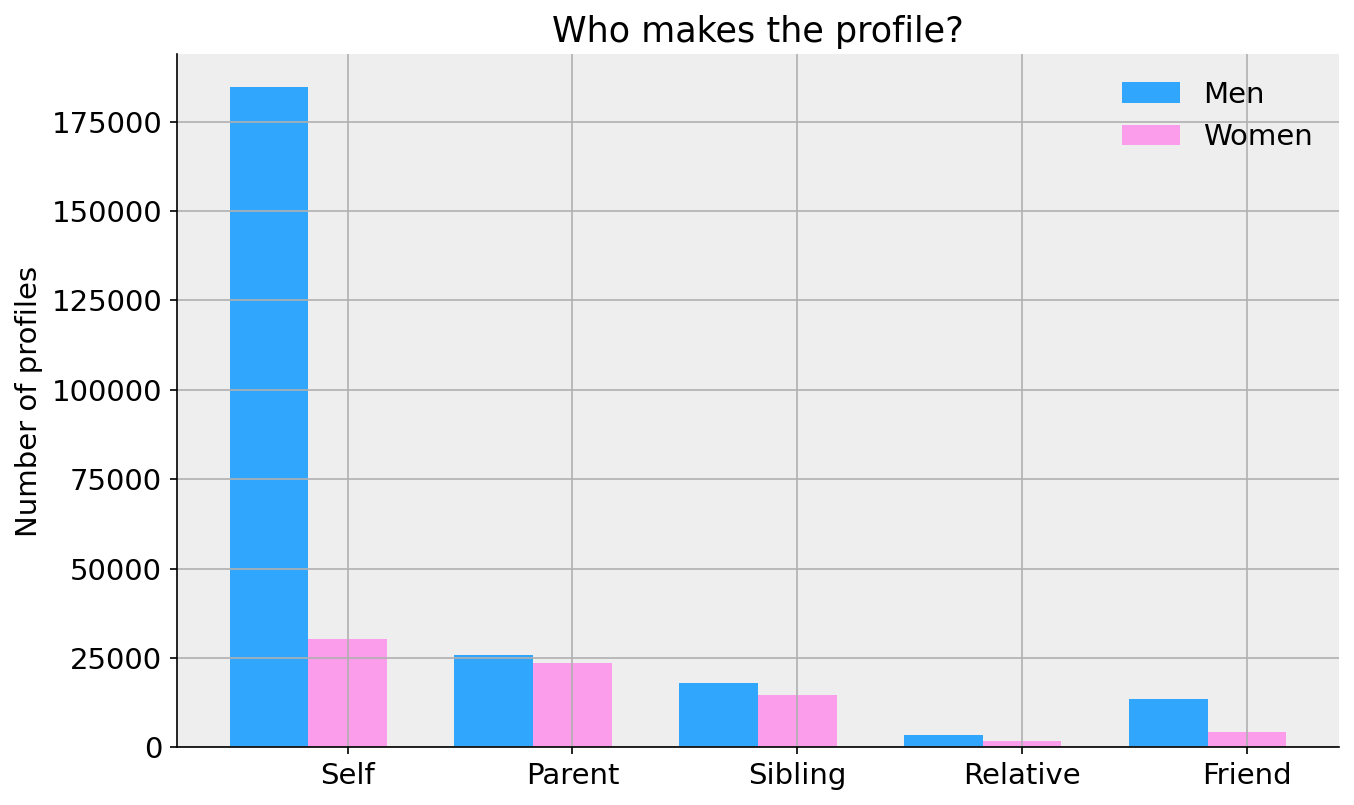

In [48]:
x = profiles['created_for'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['created_for'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['created_for'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['created_for'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(5), y2[ii2], width, color='#30A7FC')
rects2 = ax.bar(np.arange(5)+width, y[ii], width, color='#FC9DEB')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Who makes the profile?')
ax.set_xticks(np.arange(5)+width)
ax.set_xticklabels( ("Self", "Parent", 'Sibling', 'Relative', 'Friend') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women'), frameon=False )
remove_border()        
plt.show()

#### Very interesting- more men make their own profiles. Fewer women make their own, and parents/siblings/relatives/friends tend to make profiles more often for women than men. 

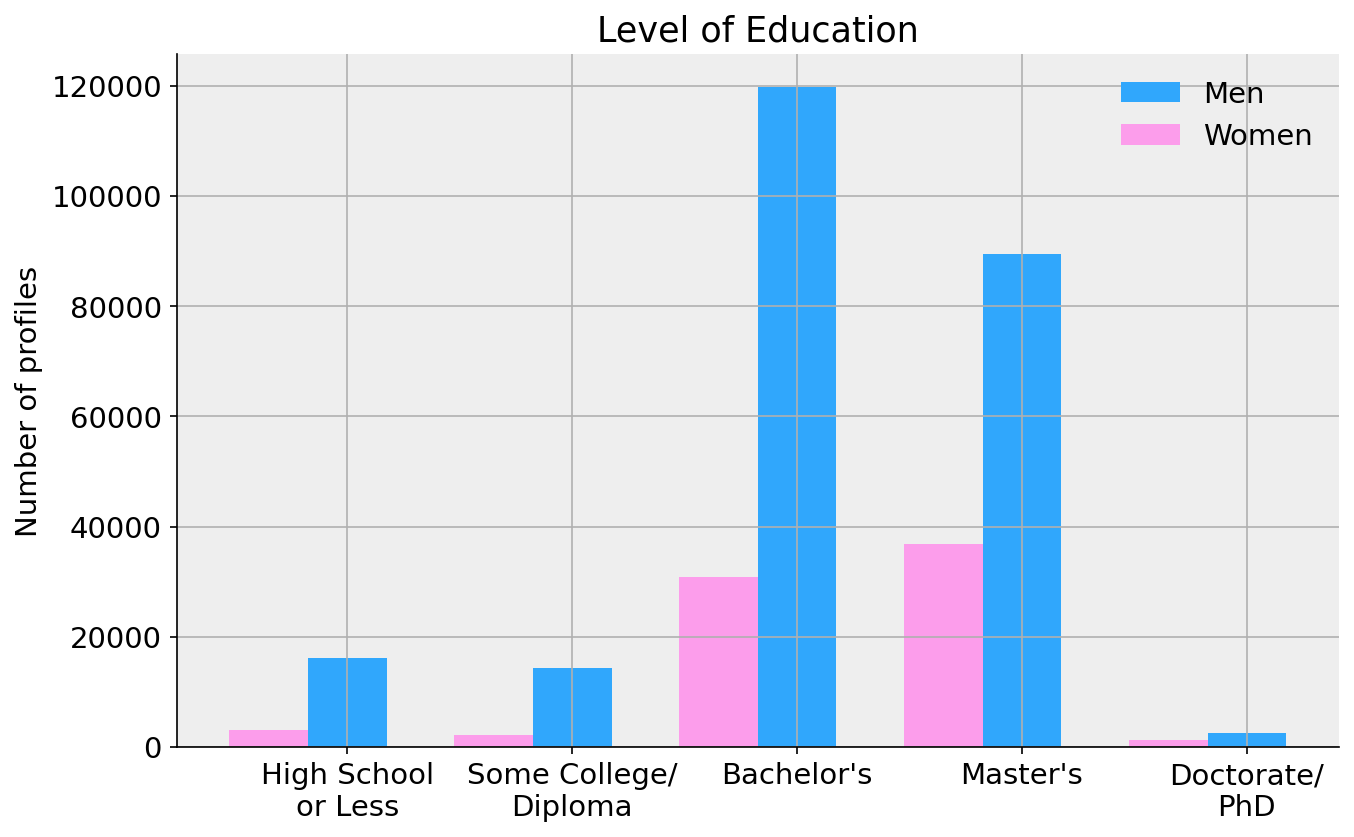

In [49]:
x = profiles['education1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['education1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['education1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['education1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(5), y[ii], width, color='#FC9DEB')
rects2 = ax.bar(np.arange(5)+width, y2[ii2], width, color='#30A7FC')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Level of Education')
ax.set_xticks(np.arange(5)+width)
ax.set_xticklabels( ("High School\nor Less", "Some College/\nDiploma", 'Bachelor\'s', 'Master\'s', 'Doctorate/\nPhD') )

ax.legend( (rects2[0], rects1[0]), ('Men', 'Women'), frameon=False )
remove_border()        
plt.show()

#### Women are as educated or more educated. Will be interesting to see how this varies by community. Would Muslim women be less educated?

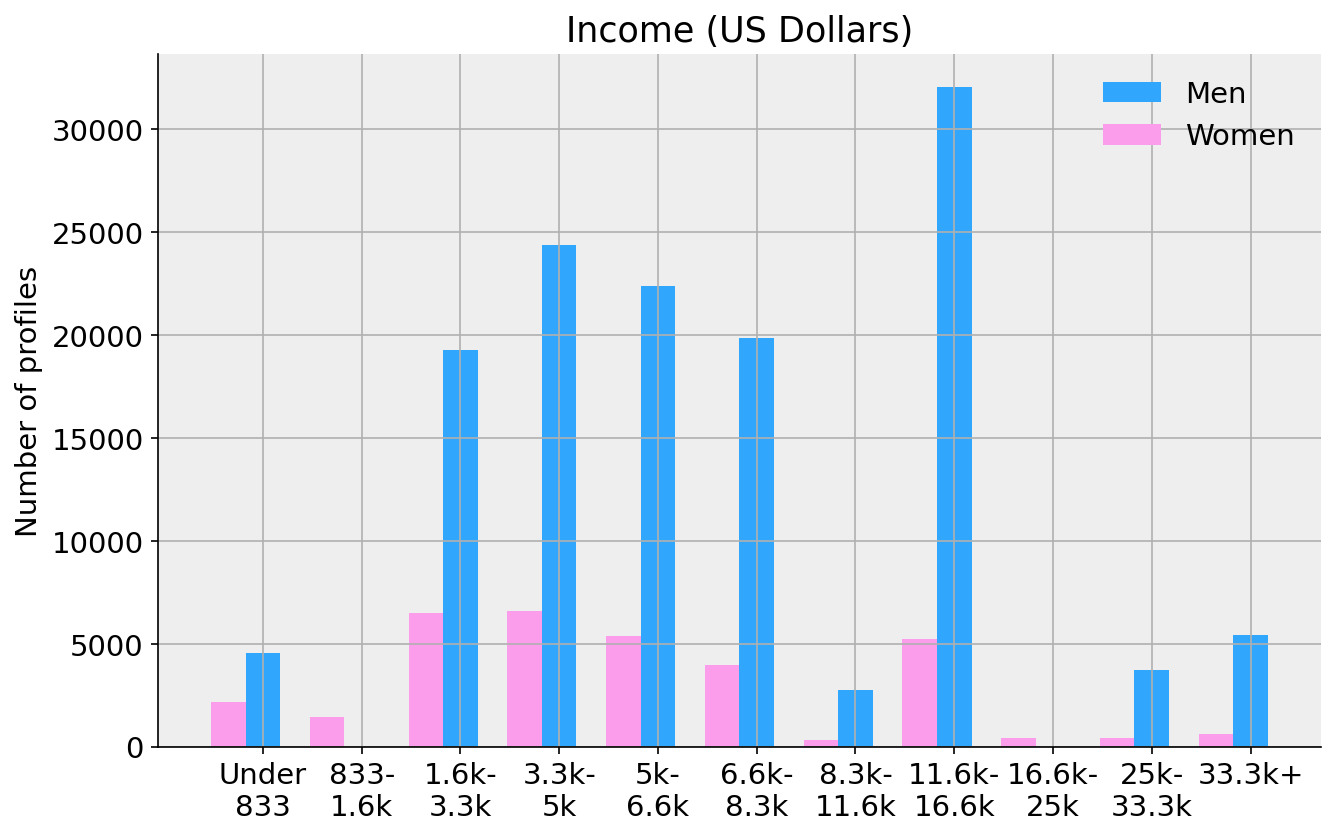

In [50]:
x = profiles['income1'][(profiles["gender"] == 0)].dropna().astype(int)
y = np.bincount(profiles['income1'][(profiles["gender"] == 0)].dropna().astype(int))
ii = np.nonzero(y)[0]

x2 = profiles['income1'][(profiles["gender"] == 1)].dropna().astype(int)
y2 = np.bincount(profiles['income1'][(profiles["gender"] == 1)].dropna().astype(int))
ii2 = np.nonzero(y)[0]

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(11), y[ii], width, color='#FC9DEB')
rects2 = ax.bar(np.arange(11)+width, y2[ii2], width, color='#30A7FC')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Income (US Dollars)')
ax.set_xticks(np.arange(11)+width)
ax.set_xticklabels( ("Under\n833", "833-\n1.6k", '1.6k-\n3.3k', '3.3k-\n5k', '5k-\n6.6k', '6.6k-\n8.3k', '8.3k-\n11.6k', '11.6k-\n16.6k', '16.6k-\n25k', '25k-\n33.3k', '33.3k+'))
ax.legend( (rects2[0], rects1[0]), ('Men', 'Women'), frameon=False )
remove_border()        
plt.show()

#### Interesting- men earn more, despite the roughly equal education qualifications. The 8.3k-11.6k option has almost no takers, perhaps because in rupees it is 700,000 - 1 million and the others are over 1 million?

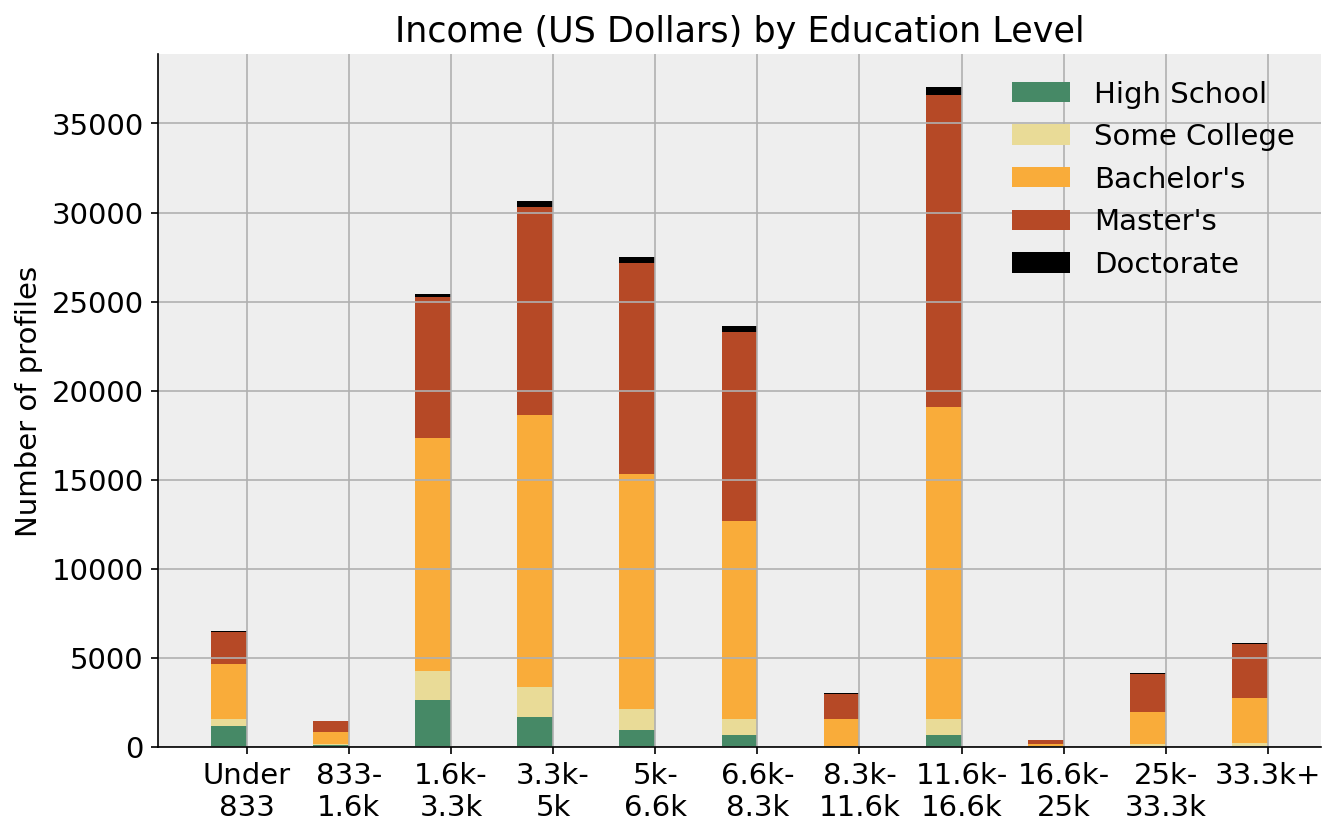

In [77]:
temp = profiles[profiles['education1'] == 0][['income1']].dropna().groupby('income1').value_counts().rename('income1')
temp[6.0]=0.0
temp[10.0]=0.0

bar0   = temp
bar1 = profiles[profiles['education1'] == 1][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar2 = profiles[profiles['education1'] == 2][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar3 = profiles[profiles['education1'] == 3][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar4 = profiles[profiles['education1'] == 4][['income1']].dropna().groupby('income1').value_counts().rename('income1')

ind = np.arange(11)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p0 = plt.bar(ind, bar0, width, color='#468966')
p1 = plt.bar(ind, bar1, width, color='#E9DB97', bottom=bar0)
p2 = plt.bar(ind, bar2, width, color='#F9AC3A', bottom=bar1+bar0)
p3 = plt.bar(ind, bar3, width, color='#B64926', bottom=bar2+bar1+bar0)
p4 = plt.bar(ind, bar4, width, color='#000000', bottom=bar3+bar2+bar1+bar0)

plt.ylabel('Number of profiles')
plt.title('Income (US Dollars) by Education Level')
plt.xticks(ind+width/2., ("Under\n833", "833-\n1.6k", '1.6k-\n3.3k', '3.3k-\n5k', '5k-\n6.6k', '6.6k-\n8.3k', '8.3k-\n11.6k', '11.6k-\n16.6k', '16.6k-\n25k', '25k-\n33.3k', '33.3k+'))
#plt.yticks(np.arange(0,81,10))
plt.legend( (p0[0], p1[0], p2[0], p3[0], p4[0]), ('High School', 'Some College', 'Bachelor\'s', 'Master\'s', 'Doctorate') , frameon=False)
remove_border()
plt.show()

#### Interesting- there is a clear connection between education and income, as for higher income levels the lower education categories disappear in the chart above. 

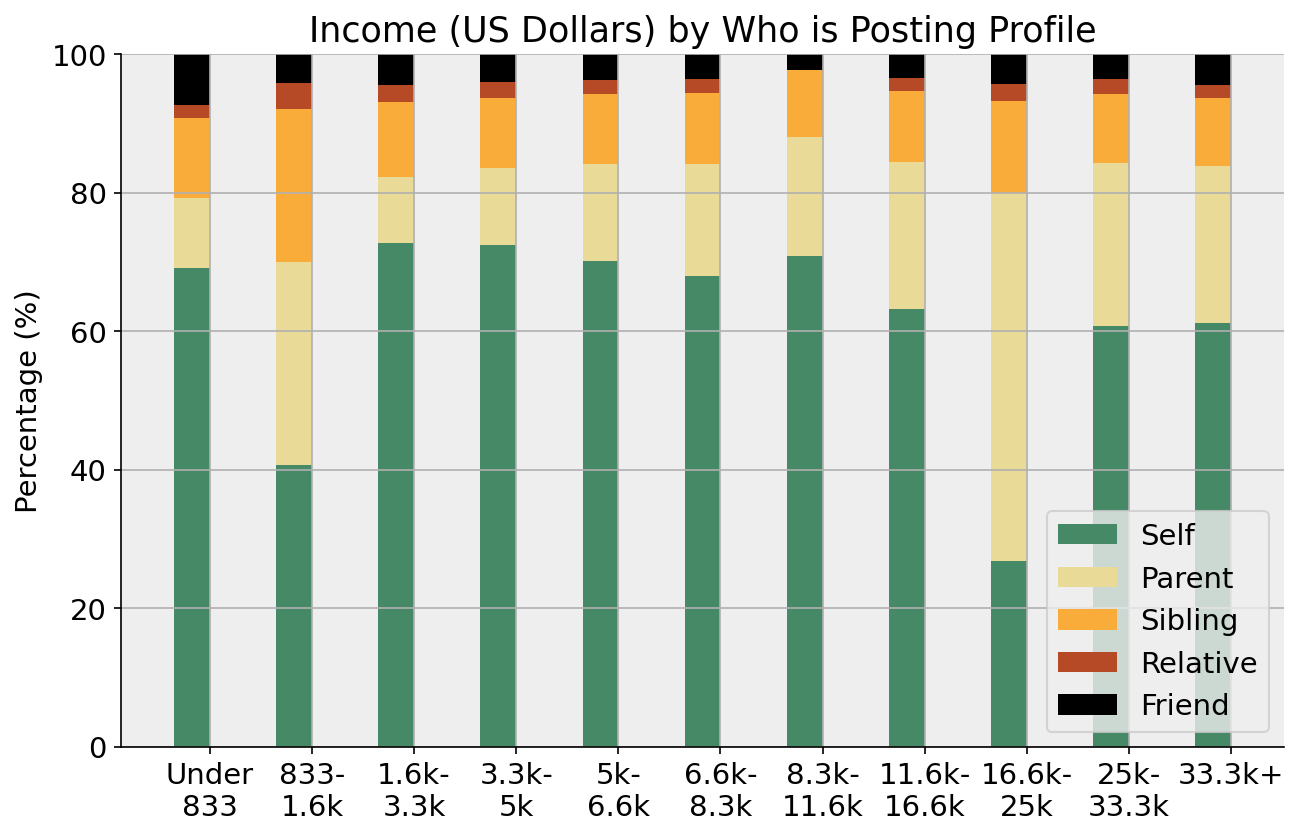

In [78]:
bar0 = profiles[profiles['created_for'] == 0][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar1 = profiles[profiles['created_for'] == 1][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar2 = profiles[profiles['created_for'] == 2][['income1']].dropna().groupby('income1').value_counts().rename('income1')
temp = profiles[profiles['created_for'] == 3][['income1']].dropna().groupby('income1').value_counts().rename('income1')
temp[6.0]=0.0
bar3 = temp
bar4 = profiles[profiles['created_for'] == 4][['income1']].dropna().groupby('income1').value_counts().rename('income1')

ind = np.arange(11)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fbar0 = [0.0] * 11
fbar1 = [0.0] * 11
fbar2 = [0.0] * 11
fbar3 = [0.0] * 11
fbar4 = [0.0] * 11

for i in range(11):
    sum = float(bar0[i] + bar1[i] + bar2[i] + bar3[i] + bar4[i])
    fbar0[i] = (100.0*float(bar0[i])) / sum
    fbar1[i] = (100.0*float(bar1[i])) / sum
    fbar2[i] = (100.0*float(bar2[i])) / sum
    fbar3[i] = (100.0*float(bar3[i])) / sum
    fbar4[i] = (100.0*float(bar4[i])) / sum
    
p0 = plt.bar(ind, fbar0, width, color='#468966')
p1 = plt.bar(ind, fbar1, width, color='#E9DB97', bottom=fbar0)
p2 = plt.bar(ind, fbar2, width, color='#F9AC3A', bottom=[(fbar0[i] + fbar1[i]) for i in range(11)])
p3 = plt.bar(ind, fbar3, width, color='#B64926', bottom=[(fbar0[i] + fbar1[i] + fbar2[i]) for i in range(11)])
p4 = plt.bar(ind, fbar4, width, color='#000000', bottom=[(fbar0[i] + fbar1[i] + fbar2[i] + fbar3[i]) for i in range(11)])

plt.title('Income (US Dollars) by Who is Posting Profile')
plt.xticks(ind+width/2., ("Under\n833", "833-\n1.6k", '1.6k-\n3.3k', '3.3k-\n5k', '5k-\n6.6k', '6.6k-\n8.3k', '8.3k-\n11.6k', '11.6k-\n16.6k', '16.6k-\n25k', '25k-\n33.3k', '33.3k+'))
plt.legend( (p0[0], p1[0], p2[0], p3[0], p4[0]), ('Self', 'Parent', 'Sibling', 'Relative', 'Friend') , frameon=True, loc='lower right')
plt.ylim([0,100])
plt.ylabel('Percentage (%)')
remove_border()
plt.show()

#### Interesting- at the lowest and highest income levels it becomes less popular for someone to post their profile themselves. Could this refer to the several women who don't earn (lowest income category) and whose profiles are posted by others, as well as the elite men who earn a lot (highest income category), for whom profiles are again being posted by others?

In [79]:
x = profiles['horoscope'].dropna().astype(int)
y = np.bincount(profiles['horoscope'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

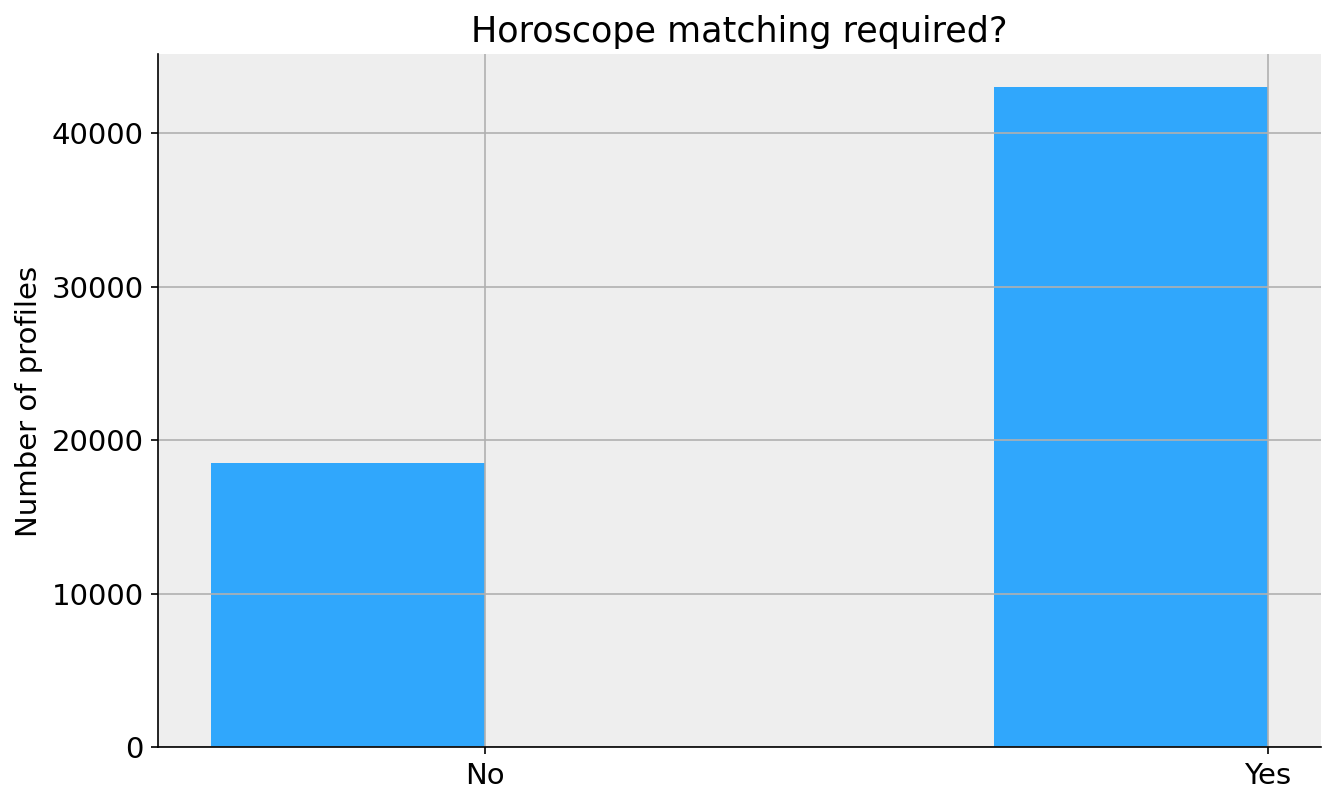

In [80]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(2)+width, y[ii], width, color='#30A7FC')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Horoscope matching required?')
ax.set_xticks(np.arange(2)+(1.5*width))
ax.set_xticklabels( ("No", 'Yes') )

#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )
remove_border()        
plt.show()

#### Interestingly, looks like most users still require traditional Vedic Hindu horoscope matching. Breaking this down by religion would be interesting. 

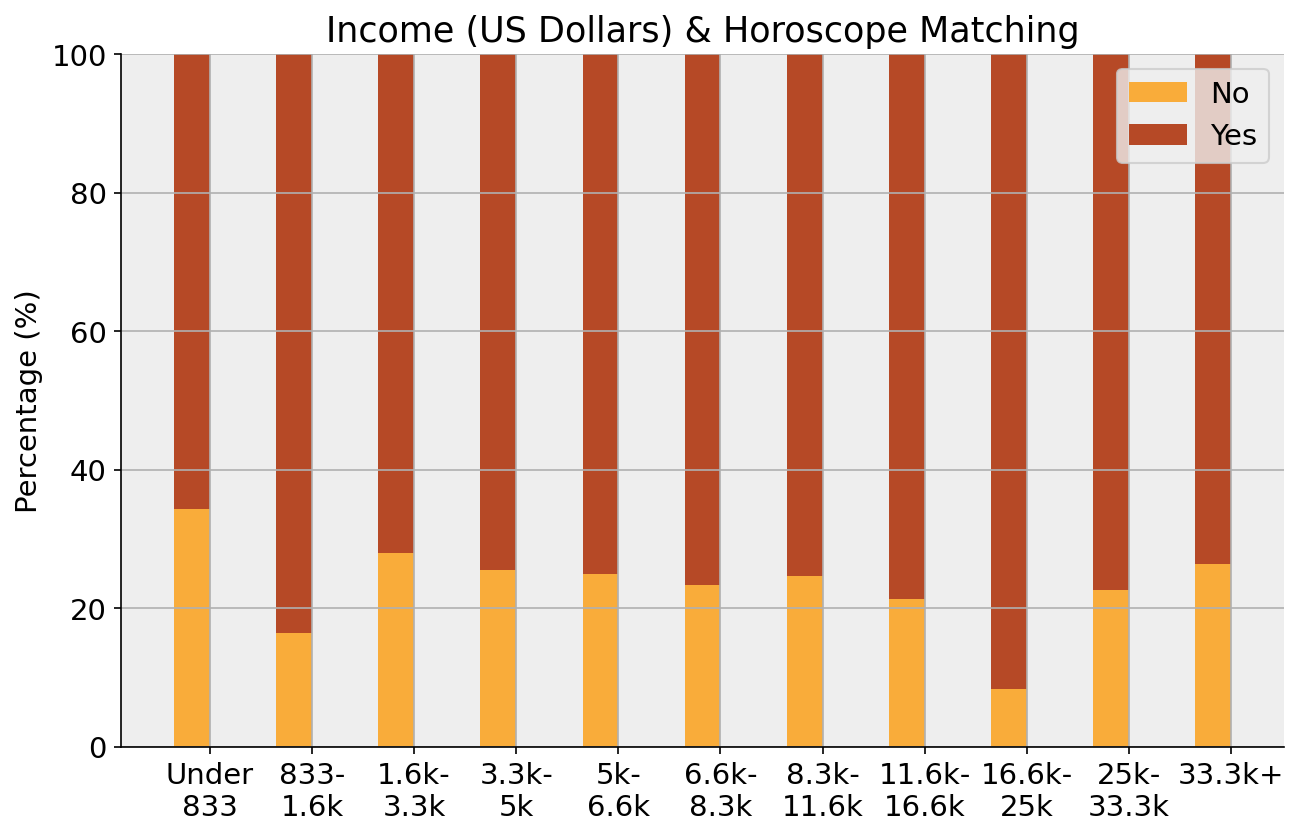

In [81]:
bar0 = profiles[profiles['horoscope'] == 0][['income1']].dropna().groupby('income1').value_counts().rename('income1')
bar1 = profiles[profiles['horoscope'] == 1][['income1']].dropna().groupby('income1').value_counts().rename('income1')

ind = np.arange(11)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fbar0 = [0.0] * 11
fbar1 = [0.0] * 11

for i in range(11):
    sum = float(bar0[i] + bar1[i])
    fbar0[i] = (100.0*float(bar0[i])) / sum
    fbar1[i] = (100.0*float(bar1[i])) / sum

    
p0 = plt.bar(ind, fbar0, width, color='#F9AC3A')
p1 = plt.bar(ind, fbar1, width, color='#B64926', bottom=fbar0)

plt.title('Income (US Dollars) & Horoscope Matching')
plt.xticks(ind+width/2., ("Under\n833", "833-\n1.6k", '1.6k-\n3.3k', '3.3k-\n5k', '5k-\n6.6k', '6.6k-\n8.3k', '8.3k-\n11.6k', '11.6k-\n16.6k', '16.6k-\n25k', '25k-\n33.3k', '33.3k+'))
plt.legend( (p0[0], p1[0]), ('No', 'Yes') , frameon=True, loc='upper right')
plt.ylim([0,100])
plt.ylabel('Percentage (%)')
remove_border()
plt.show()


#### Interesting- at the highest income level, fewer profiles require horoscope matching. Why is this not true for the second highest?!

In [82]:
x = profiles['manglik1'].dropna().astype(int)
y = np.bincount(profiles['manglik1'].dropna().astype(int))
ii = np.nonzero(y)[0]

zip(ii,y[ii])

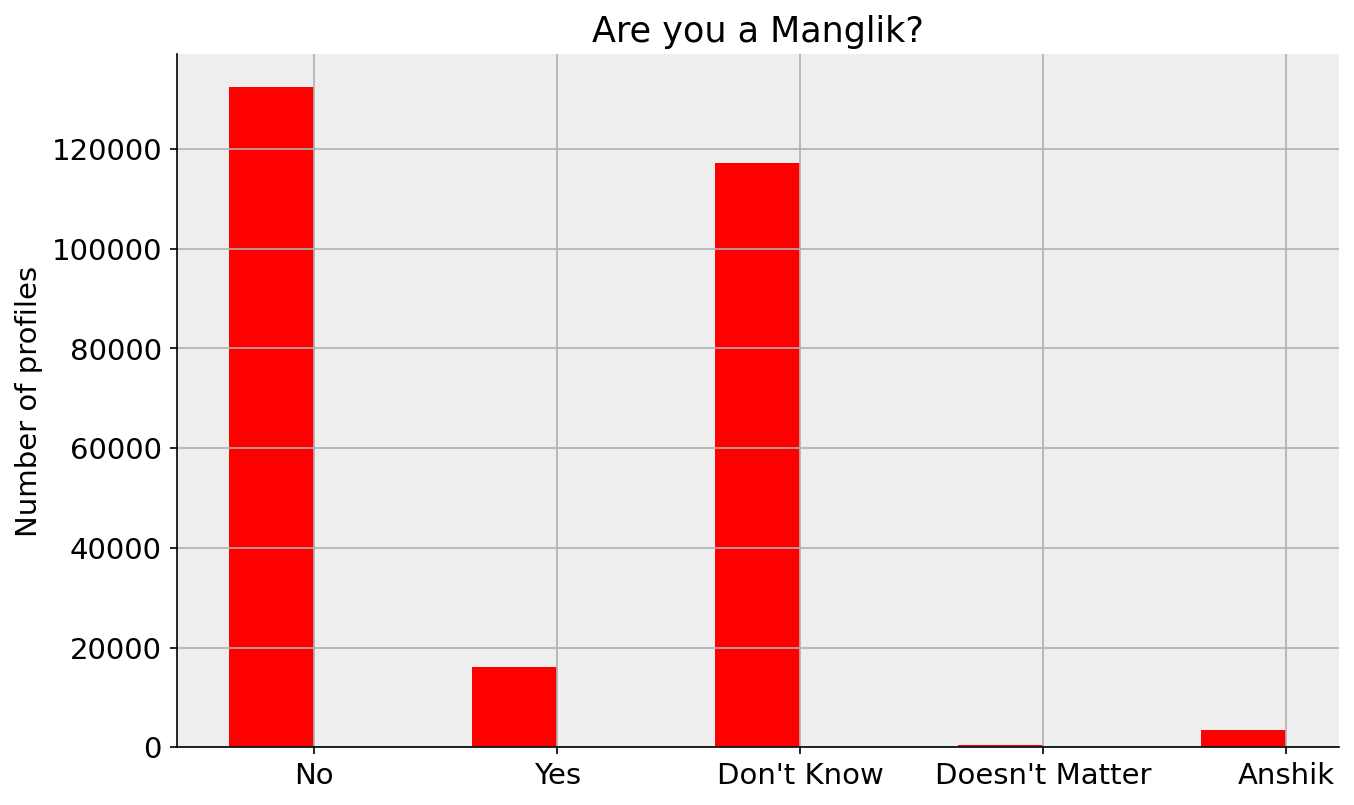

In [83]:
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(5)+width, y[ii], width, color='r')

# add some
ax.set_ylabel('Number of profiles')
ax.set_title('Are you a Manglik?')
ax.set_xticks(np.arange(5)+(1.5*width))
ax.set_xticklabels( ("No", 'Yes', "Don't Know", "Doesn't Matter", "Anshik") )
remove_border()

#### Mangal Dosha is an astrological combination that occurs if Mars (Mangal) is in the 1st,2nd, 4th, 7th, 8th, or 12th house of the Vedic astrology Ascendant chart. A person born in the presence of this condition is termed a manglik.  This condition is astrologically believed to be unfavourable for marriages, causing discomfort and tension in relationship, leading to severe disharmony among the spouses and eventually to other bigger problems. This is attributed to the "fiery" nature of Mars, the planet of war.  Also, if two mangliks marry, the negative effects are believed to cancel each other out. However, Mars is not the only planet in Vedic Astrology that is supposed to affect the relationship and these effects should be seen in a broader perspective of overall astrological compatibility.